# Evaluation Project - 2


# Avacado Project

# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# The dataset can be seen in two angles to find the average price and find the region.
¶


# Task: One of Classification and other of Regression

# Importing Necesssary Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import scipy as stats
%matplotlib inline


# First doing a regression model.

# Importing Dataset

In [2]:
df= pd.read_csv('avacado.csv')

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1               1  20-12-2015          1.35      54876.98   674.28   44638.81   
2               2  13-12-2015          0.93     118220.22   794.70  109149.67   
3               3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4               4  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  04-02-2018          1.63      17074.83  2046.96    1529.20   
18245           8  28-01-2018          1.71      13888.04  1191.70    3431.50   
18246           9  21-01-2018          1.87      13766.76  1191.92    2452.79   
18247          10  14-01-2018          1.93      16205.22  1527.63    2981.04   
18248          11  07-01-2018          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [4]:
df.shape

(18249, 14)

in the above dataframe there are 18249 rows and 14 columns

In [5]:
df.head(15)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0            0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1            1  20-12-2015          1.35      54876.98   674.28   44638.81   
2            2  13-12-2015          0.93     118220.22   794.70  109149.67   
3            3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4            4  29-11-2015          1.28      51039.60   941.48   43838.39   
5            5  22-11-2015          1.26      55979.78  1184.27   48067.99   
6            6  15-11-2015          0.99      83453.76  1368.92   73672.72   
7            7  08-11-2015          0.98     109428.33   703.75  101815.36   
8            8  01-11-2015          1.02      99811.42  1022.15   87315.57   
9            9  25-10-2015          1.07      74338.76   842.40   64757.44   
10          10  18-10-2015          1.12      84843.44   924.86   75595.85   
11          11  11-10-2015          1.28      64489.17  1582.03   52677.92   
12          12  04-10-2015          1.31      61007.10  2268.32   49880.67   
13          13  27-09-2015          0.99     106803.39  1204.88   99409.21   
14          14  20-09-2015          1.33      69759.01  1028.03   59313.12   

      4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0    48.16     8696.87     8603.62       93.25          0.0  conventional   
1    58.33     9505.56     9408.07       97.49          0.0  conventional   
2   130.50     8145.35     8042.21      103.14          0.0  conventional   
3    72.58     5811.16     5677.40      133.76          0.0  conventional   
4    75.78     6183.95     5986.26      197.69          0.0  conventional   
5    43.61     6683.91     6556.47      127.44          0.0  conventional   
6    93.26     8318.86     8196.81      122.05          0.0  conventional   
7    80.00     6829.22     6266.85      562.37          0.0  conventional   
8    85.34    11388.36    11104.53      283.83          0.0  conventional   
9   113.00     8625.92     8061.47      564.45          0.0  conventional   
10  117.07     8205.66     7877.86      327.80          0.0  conventional   
11  105.32    10123.90     9866.27      257.63          0.0  conventional   
12  101.36     8756.75     8379.98      376.77          0.0  conventional   
13  154.84     6034.46     5888.87      145.59          0.0  conventional   
14  150.50     9267.36     8489.10      778.26          0.0  conventional   

    year  region  
0   2015  Albany  
1   2015  Albany  
2   2015  Albany  
3   2015  Albany  
4   2015  Albany  
5   2015  Albany  
6   2015  Albany  
7   2015  Albany  
8   2015  Albany  
9   2015  Albany  
10  2015  Albany  
11  2015  Albany  
12  2015  Albany  
13  2015  Albany  
14  2015  Albany

In [6]:
df.tail(15)

Unnamed: 0        Date  AveragePrice  Total Volume      4046      4225  \
18234           9  21-01-2018          1.83     189317.99  27049.44  33561.32   
18235          10  14-01-2018          1.82     207999.67  33869.12  47435.14   
18236          11  07-01-2018          1.48     297190.60  34734.97  62967.74   
18237           0  25-03-2018          1.62      15303.40   2325.30   2171.66   
18238           1  18-03-2018          1.56      15896.38   2055.35   1499.55   
18239           2  11-03-2018          1.56      22128.42   2162.67   3194.25   
18240           3  04-03-2018          1.54      17393.30   1832.24   1905.57   
18241           4  25-02-2018          1.57      18421.24   1974.26   2482.65   
18242           5  18-02-2018          1.56      17597.12   1892.05   1928.36   
18243           6  11-02-2018          1.57      15986.17   1924.28   1368.32   
18244           7  04-02-2018          1.63      17074.83   2046.96   1529.20   
18245           8  28-01-2018          1.71      13888.04   1191.70   3431.50   
18246           9  21-01-2018          1.87      13766.76   1191.92   2452.79   
18247          10  14-01-2018          1.93      16205.22   1527.63   2981.04   
18248          11  07-01-2018          1.62      17489.58   2894.77   2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18234  439.47   128267.76    76091.99    51947.50       228.27  organic  2018   
18235  433.52   126261.89    89115.78    37133.99        12.12  organic  2018   
18236  157.77   199330.12   103761.55    95544.39        24.18  organic  2018   
18237    0.00    10806.44    10569.80      236.64         0.00  organic  2018   
18238    0.00    12341.48    12114.81      226.67         0.00  organic  2018   
18239    8.93    16762.57    16510.32      252.25         0.00  organic  2018   
18240    0.00    13655.49    13401.93      253.56         0.00  organic  2018   
18241    0.00    13964.33    13698.27      266.06         0.00  organic  2018   
18242    0.00    13776.71    13553.53      223.18         0.00  organic  2018   
18243    0.00    12693.57    12437.35      256.22         0.00  organic  2018   
18244    0.00    13498.67    13066.82      431.85         0.00  organic  2018   
18245    0.00     9264.84     8940.04      324.80         0.00  organic  2018   
18246  727.94     9394.11     9351.80       42.31         0.00  organic  2018   
18247  727.01    10969.54    10919.54       50.00         0.00  organic  2018   
18248  224.53    12014.15    11988.14       26.01         0.00  organic  2018   

                 region  
18234              West  
18235              West  
18236              West  
18237  WestTexNewMexico  
18238  WestTexNewMexico  
18239  WestTexNewMexico  
18240  WestTexNewMexico  
18241  WestTexNewMexico  
18242  WestTexNewMexico  
18243  WestTexNewMexico  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [7]:
df.shape

(18249, 14)

From the above dataset we can observed that there are 18249 rows and 14 columns, out of which one is target value, and the remaining are independent variable. in this our target variable is average price, so as our target variable is in a continuous data form, so it will be regresssion problem.

# Exploratory Data Analysis

In [8]:
df.shape

(18249, 14)

In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [10]:
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In the above dataset as the column unnamed has no use for our buildinding model, so we remove this column.

In [11]:
# removing unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1      20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2      13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3      06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4      29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  04-02-2018          1.63      17074.83  2046.96    1529.20    0.00   
18245  28-01-2018          1.71      13888.04  1191.70    3431.50    0.00   
18246  21-01-2018          1.87      13766.76  1191.92    2452.79  727.94   
18247  14-01-2018          1.93      16205.22  1527.63    2981.04  727.01   
18248  07-01-2018          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [13]:
#checking the types of the columns
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As we can observed that there are 3 types of datatypes(object, float and int)present in the dataset.
But as we can see that the date column is in a object datatype, so first we have to convert it in date type format, so that it will be understandble for our model.


In [14]:
#converting date into date type object
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

As we can see that we change the datatype of the date column.
now separating the date, month and year.but as year column is already given in a seprated column so no need to seprate it.

In [16]:
# Now Seperating date and month
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [17]:
#drop  the original date column
df.drop('Date', axis=1, inplace=True)

In [18]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany      6   12  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      4    2  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      7    1  

[18249 rows x 14 columns]

# Checking the null values

In [19]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [20]:
df.isnull().sum().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


As we can see that there are no null values present in the dataset.

<Axes: >

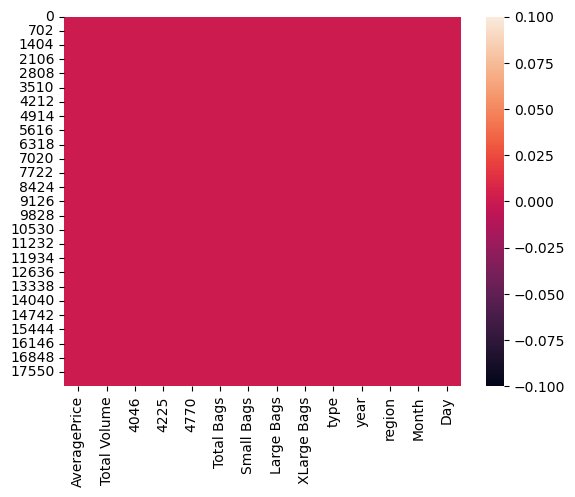

In [22]:
#Lets visualize the null values using the heatmap
sns.heatmap(df.isnull())

From the above heatmap we can observed that there are no null values present in the dataset

~Now checking the value counts of each column

In [23]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64


0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name

In [24]:
# checking the unique values in each column
df.nunique().to_frame("No. of unique values")

No. of unique values
AveragePrice                   259
Total Volume                 18237
4046                         17702
4225                         18103
4770                         12071
Total Bags                   18097
Small Bags                   17321
Large Bags                   15082
XLarge Bags                   5588
type                             2
year                             4
region                          54
Month                           12
Day                             31

~Checking duplicates values in the column

In [25]:
print("Total duplicates values are:", df.duplicated().sum())

Total duplicates values are: 0


As we can see that there are no duplicates values present in the dataset

~Checking for the whitespaces in the columns

In [26]:
df.loc[df['AveragePrice']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

As we can see that there are no whitespaces present in the dataset

Seprating numerical and categorical column

In [27]:
categorical_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]== 'object':
        categorical_column.append(i)
print("Categorical Columns:", categorical_column)
print("\n")

#checking for numericals columns
numerical_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_column.append(i)
print("Numerical Columns", numerical_column)


Categorical Columns: ['type', 'region']


Numerical Columns ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# Description of dataset

In [28]:
#statistical summary of the numerical columns
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.372842     15.466984  
std        3.525034      8.984552  
min        1.000000      1.000000  
25%        3.000000      7.000000  
50%        6.000000     16.000000  
75%       10.000000     23.000000  
max       12.000000     31.000000

This gives the statstical summary of the numerical column. The summary of the dataset looks perfect as there are no negative values or invalid values present in the dataset.From the above dataset we can observed the following:
1) As the value count of each column is same, it means no values are missing in the dataset.
2) As we can see that mean value in the column 4046, total bags, smallbags, xlargebags is less than the median value, it ,means the data is skewed to the left side.
3) also in the column total volume, 4770, largebags, the mean value is more than the median value, it means data is skewed in the right side.
4) As we can observed that there are a difference between the 75% and the max values, it means outliers are present.
5) We can also observed the standard deviation, minimum value, and 25% value from the above description.

# Data Visualization

~univariate analysis

conventional    9126
organic         9123
Name: type, dtype: int64


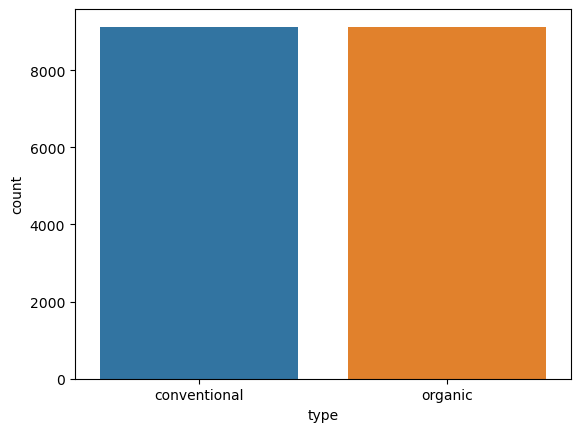

In [29]:
# visualizing the 'type' of the avacado
ax= sns.countplot(x = 'type', data=df)
print(df['type'].value_counts())

From the above barplot we can observed that the both conventional and oraganic type of avacado are equal in counts. It means both the types have equal demand in market.

The relationship of each other by pairing plot

<Figure size 2500x2500 with 0 Axes>

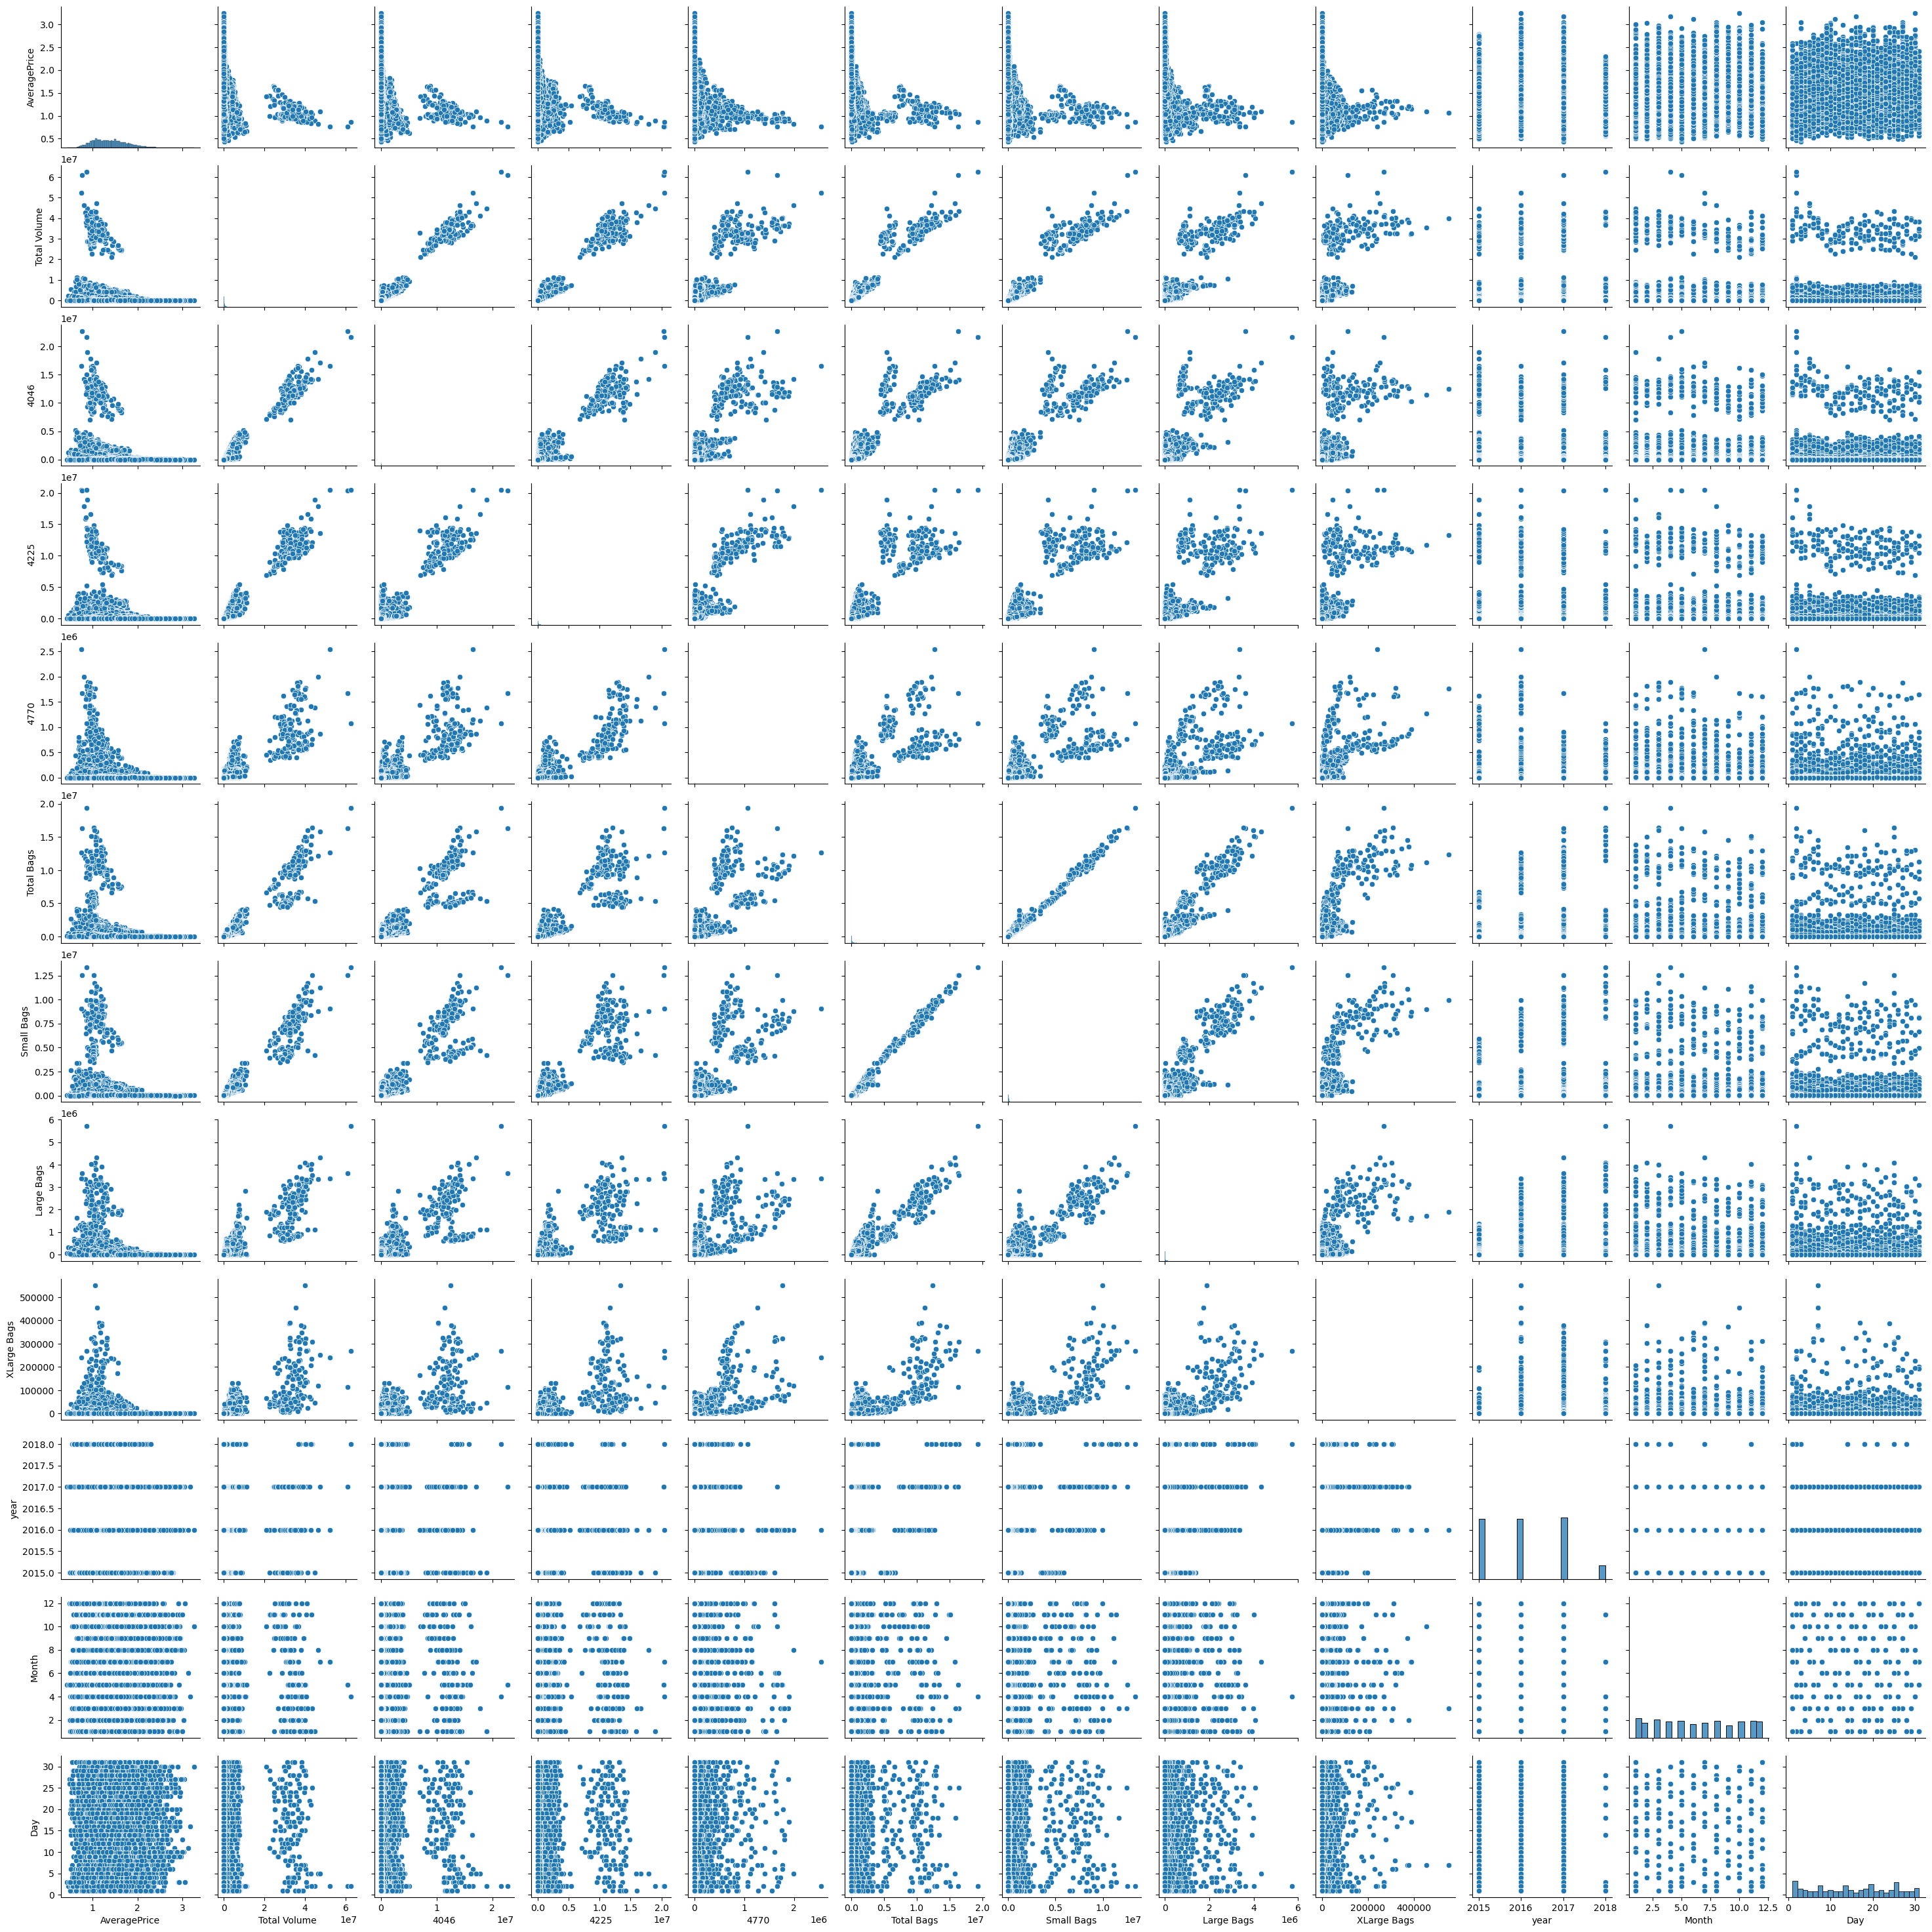

In [30]:
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

From the above pair plot we can observed that their is strong relationship between TotalBags and SmallBags, by drawing a graph this will incrase the problem of multicollinerity. Lets visualize it by drawing a graph.

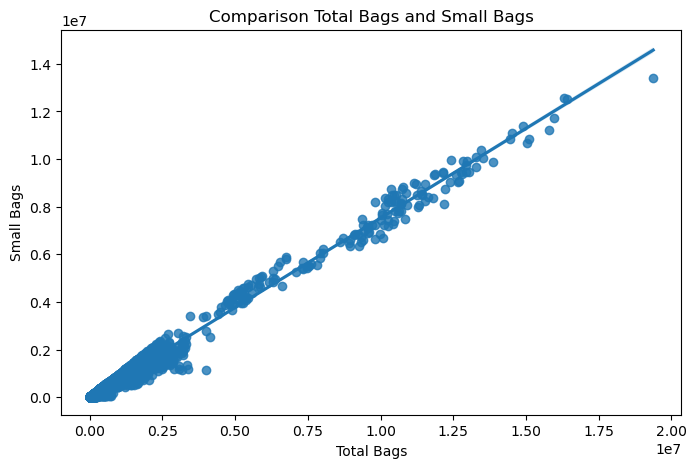

In [31]:
plt.figure(figsize=(8,5))
plt.title("Comparison Total Bags and Small Bags")
sns.regplot(x='Total Bags',y='Small Bags',data=df)
plt.xlabel("Total Bags",fontsize=10)
plt.ylabel("Small Bags",fontsize=10)
plt.show()

From the above graph we can observed that total bags and small bags are strongly related to each other. It means most of the customers will use small bags.

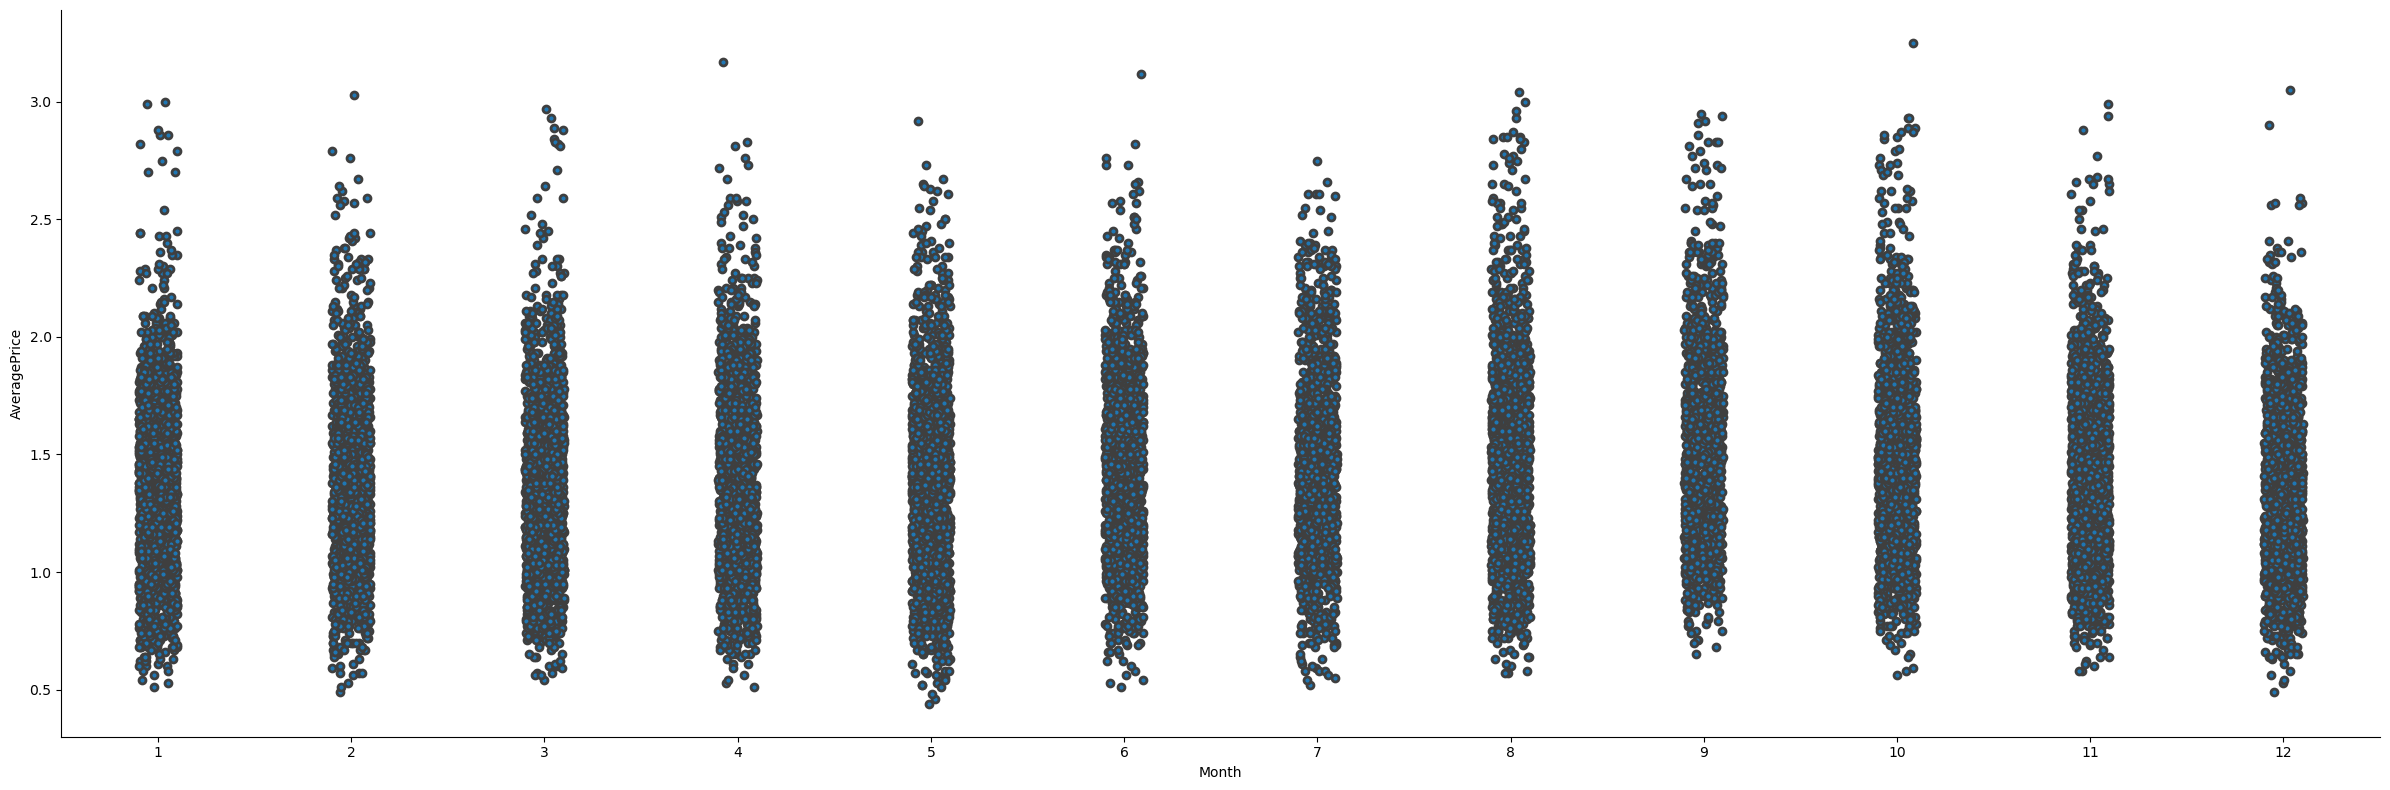

In [32]:
#relationship between month and average price
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=3)
plt.show()

From the above graph we  can observed that avacado price are more in the month of August, september, october and november.

~bivariate Analysis comparing with average price

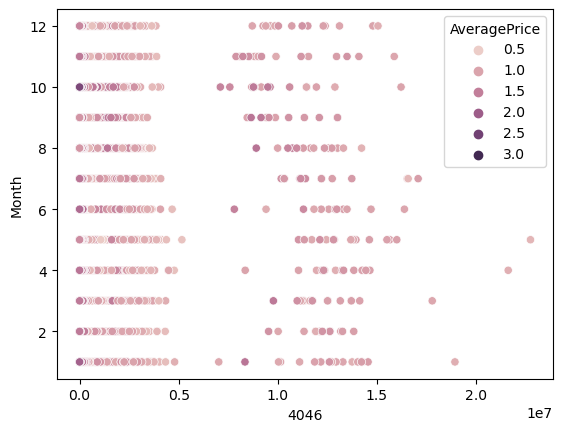

In [33]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=df)
plt.show()

From the above graph we  can observed that Average price is high from the month of August to november.

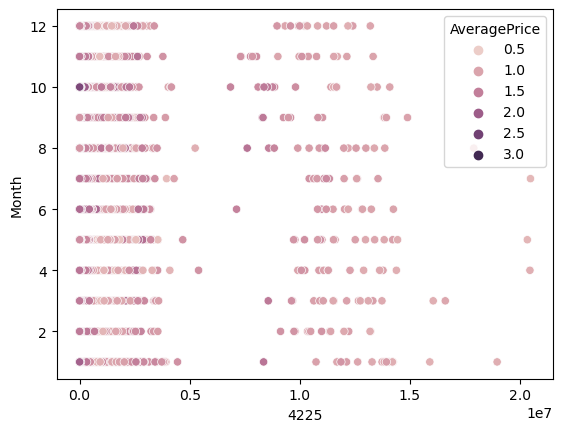

In [34]:
 # average price as hue and months vs 4225
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=df)
plt.show()

This figure also shows same results, but 4225 have good quality campared to 4046 and the average price of 4225 is high.

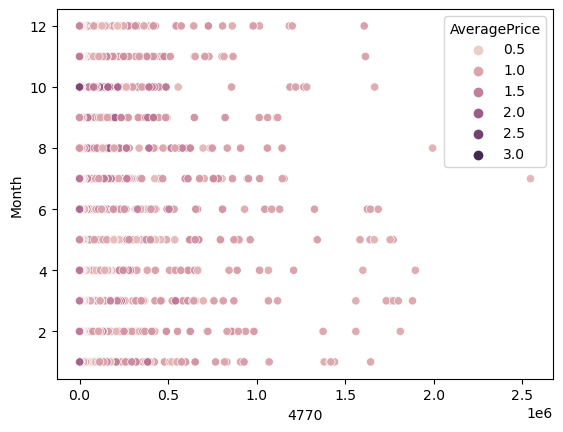

In [35]:
# average price as hue and months vs 4770
sns.scatterplot(x = "4770", y = "Month",hue='AveragePrice',data=df)
plt.show()

Relationship between year and Total volume comparing with type

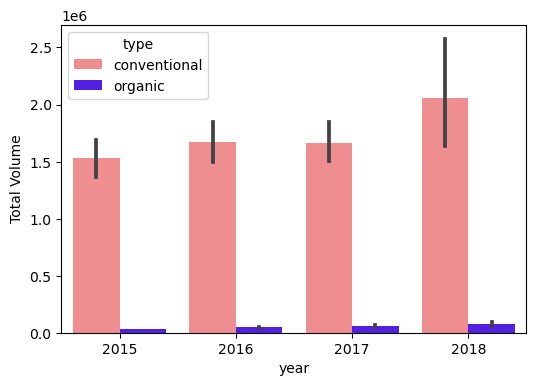

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="gnuplot2_r")
plt.show()

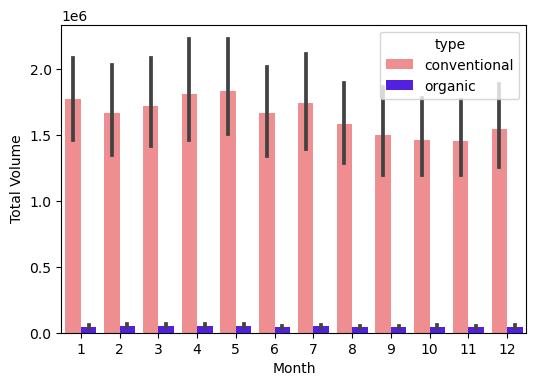

In [37]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Total Volume',hue="type",data=df,palette="gnuplot2_r")
plt.show()

From the above graphs we can observed that the Conventional type of avacado are produced than the organic avacado in both year and in months column.

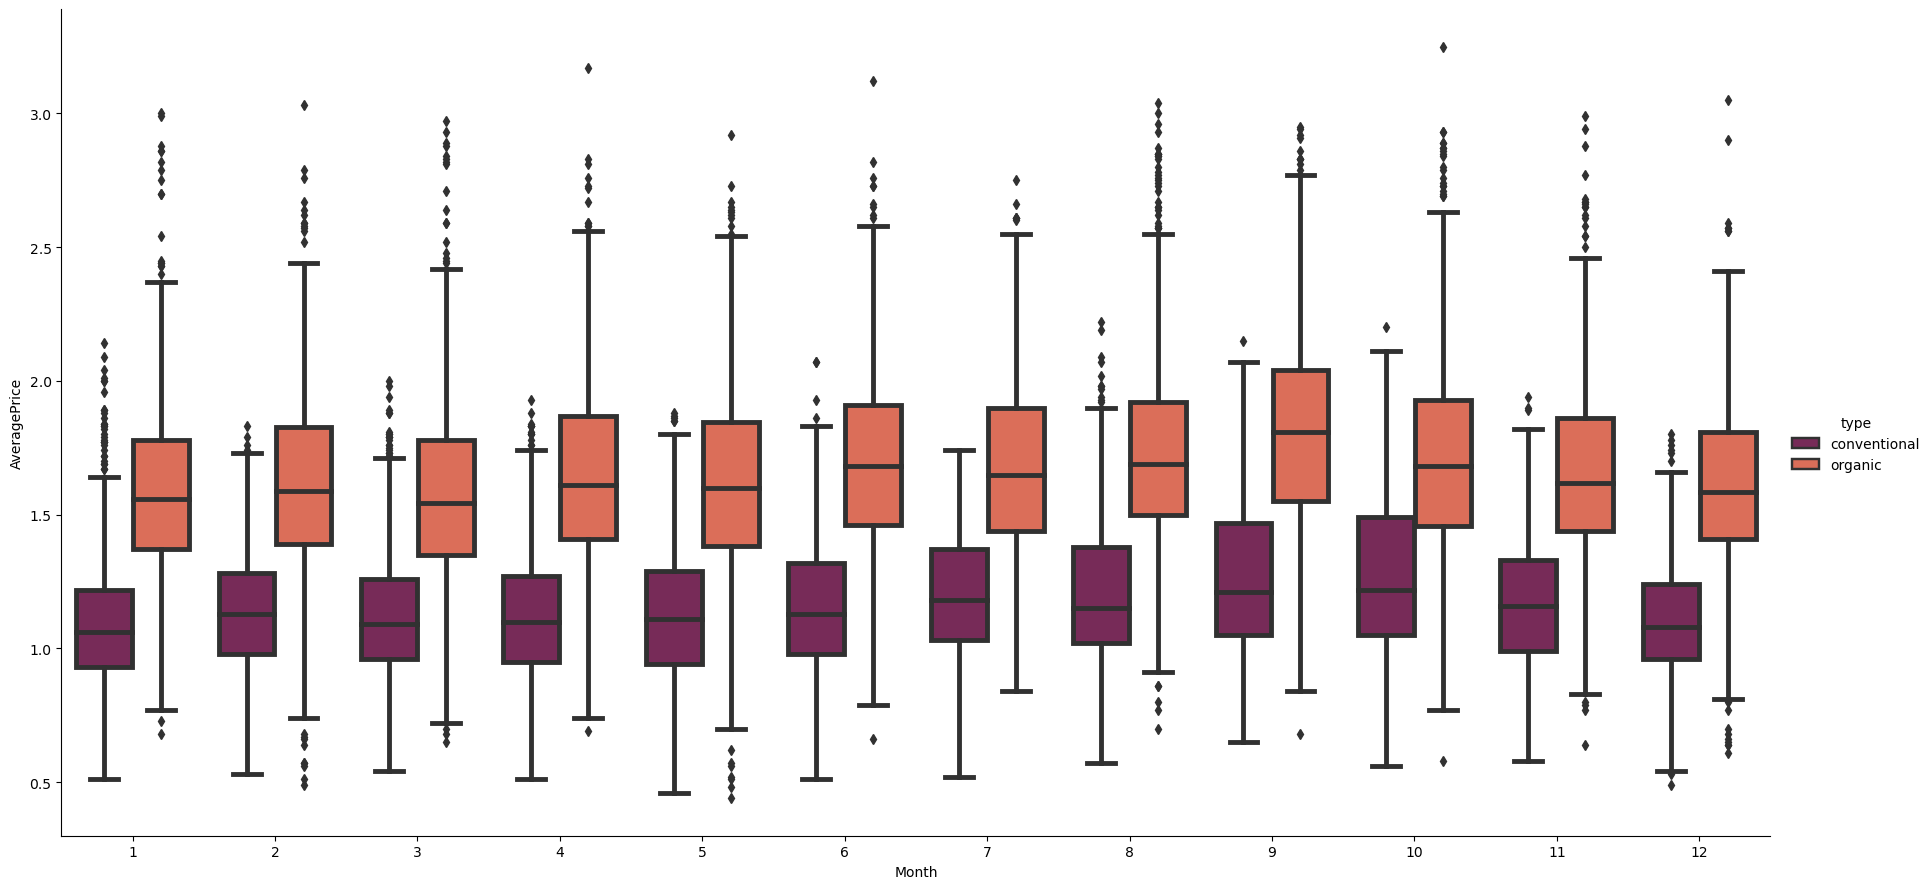

In [38]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=9, linewidth=3.5, aspect=2,palette="rocket");

From the above grph we can observed that the price of organic avacado is more than the conventional avacado.

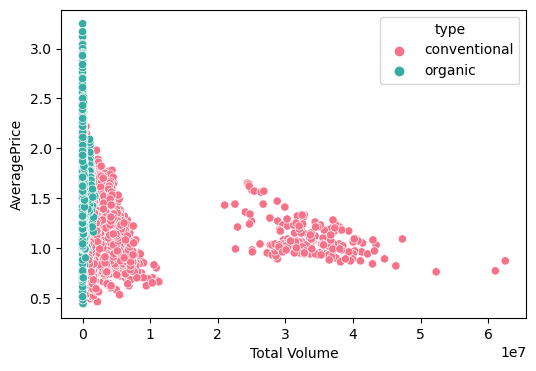

In [39]:
#relationship between total volume and price
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

This scatter plot gives the relationship between the total volume and average price on the basis of type. All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. Because of low price of conventional the higher volumns were purchase were conventional.

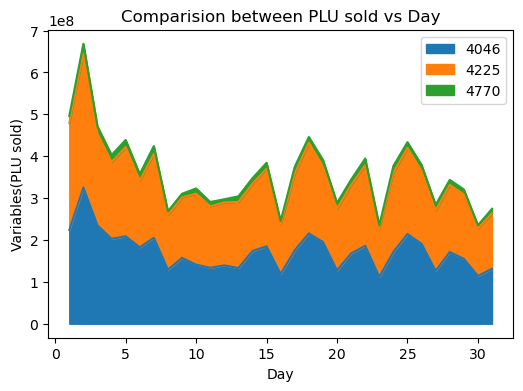

In [40]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the above graph we can observed that the PLU 4046 and 4225 is sold more than the PLU 4770

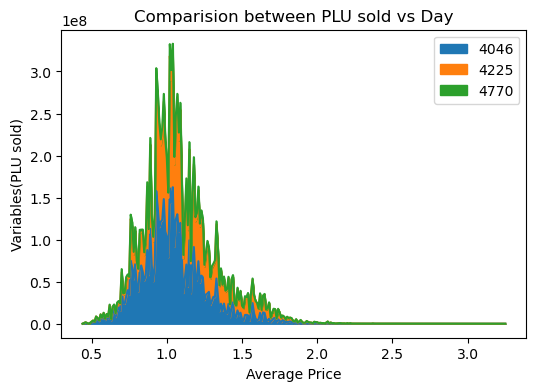

In [41]:
# Type of PLU sold and Average Price
variables = df[['4046', '4225', '4770']].groupby(df.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Average Price")
plt.ylabel("Variables(PLU sold)")
plt.show()

WE can observed that PLU 4770 is higher in price than the PLU 4046 and 4225

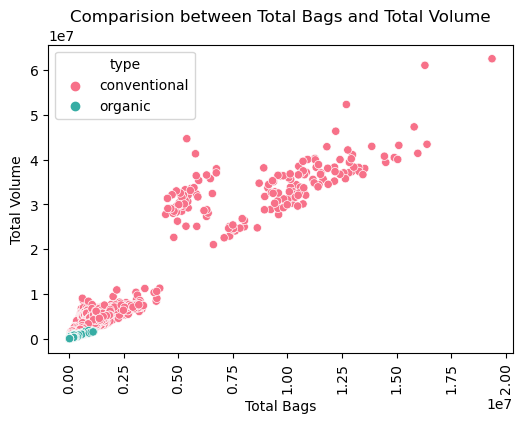

In [42]:
#comparison between total bags and total volume.
plt.figure(figsize=(6,4))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

we can observed that the total bags for conventional avacado type is more in volume

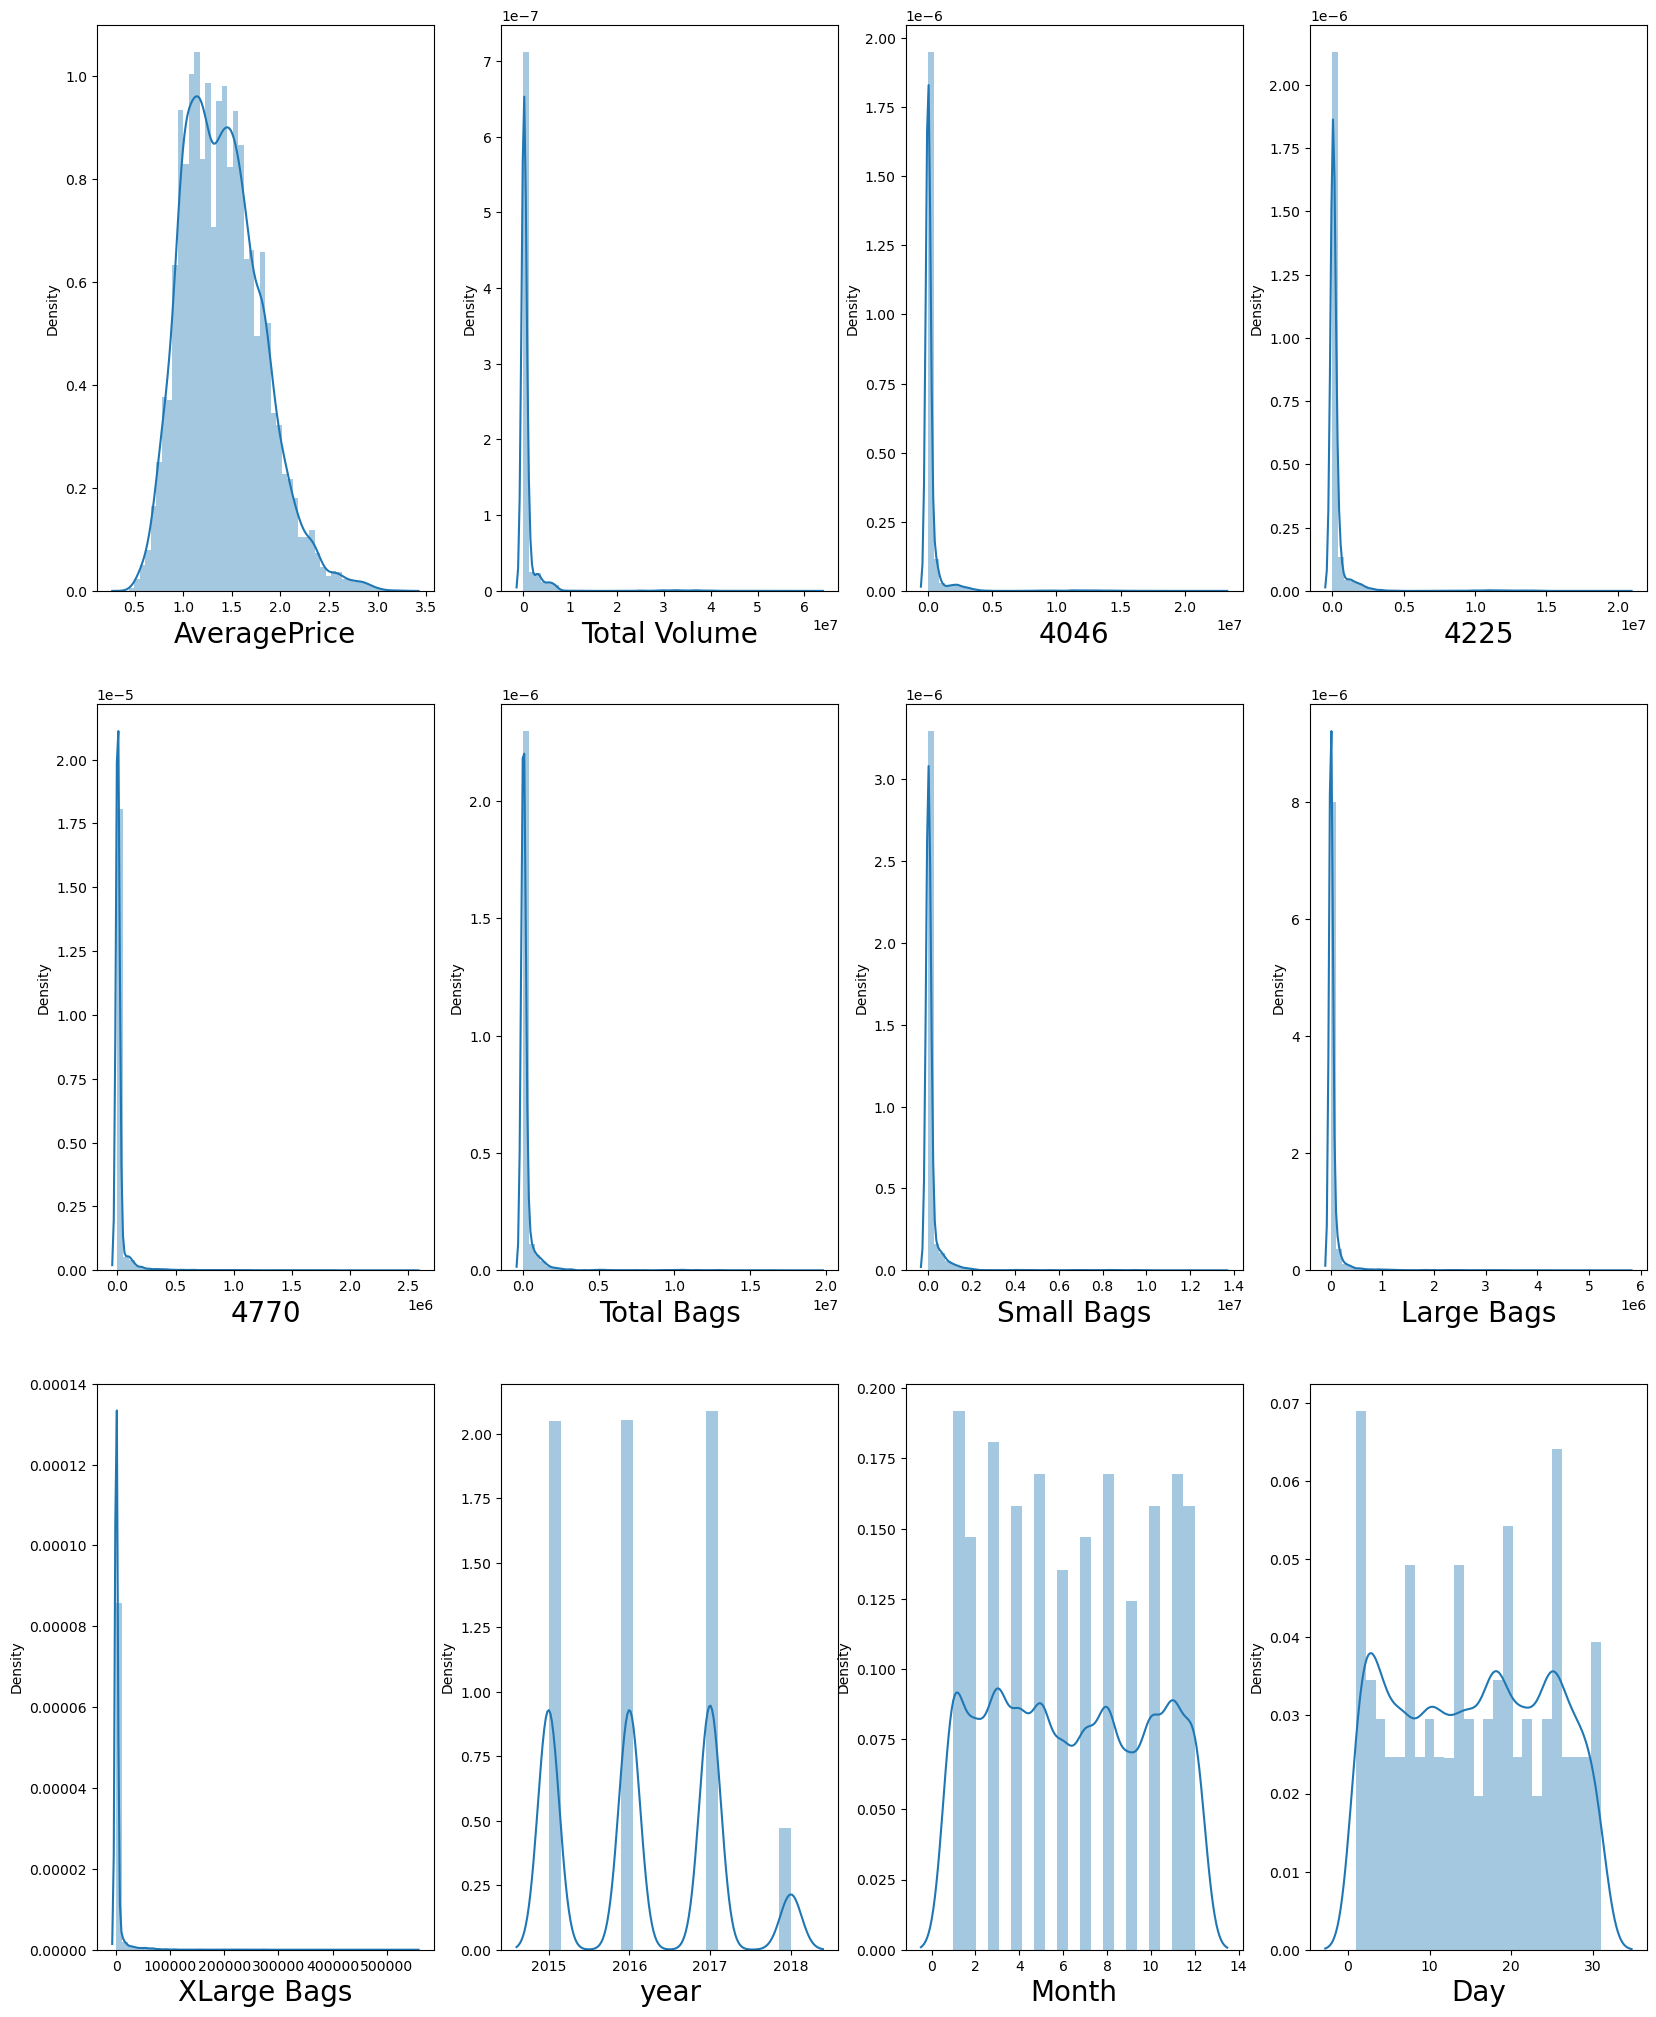

In [43]:
#Visualization for numerical columns

plt.figure(figsize= (20,25))
plotnumber = 1

for column in numerical_column:
    if plotnumber<=15:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

From the above graphs we can see the skewness in most of the columns.

# Checking for the outliers

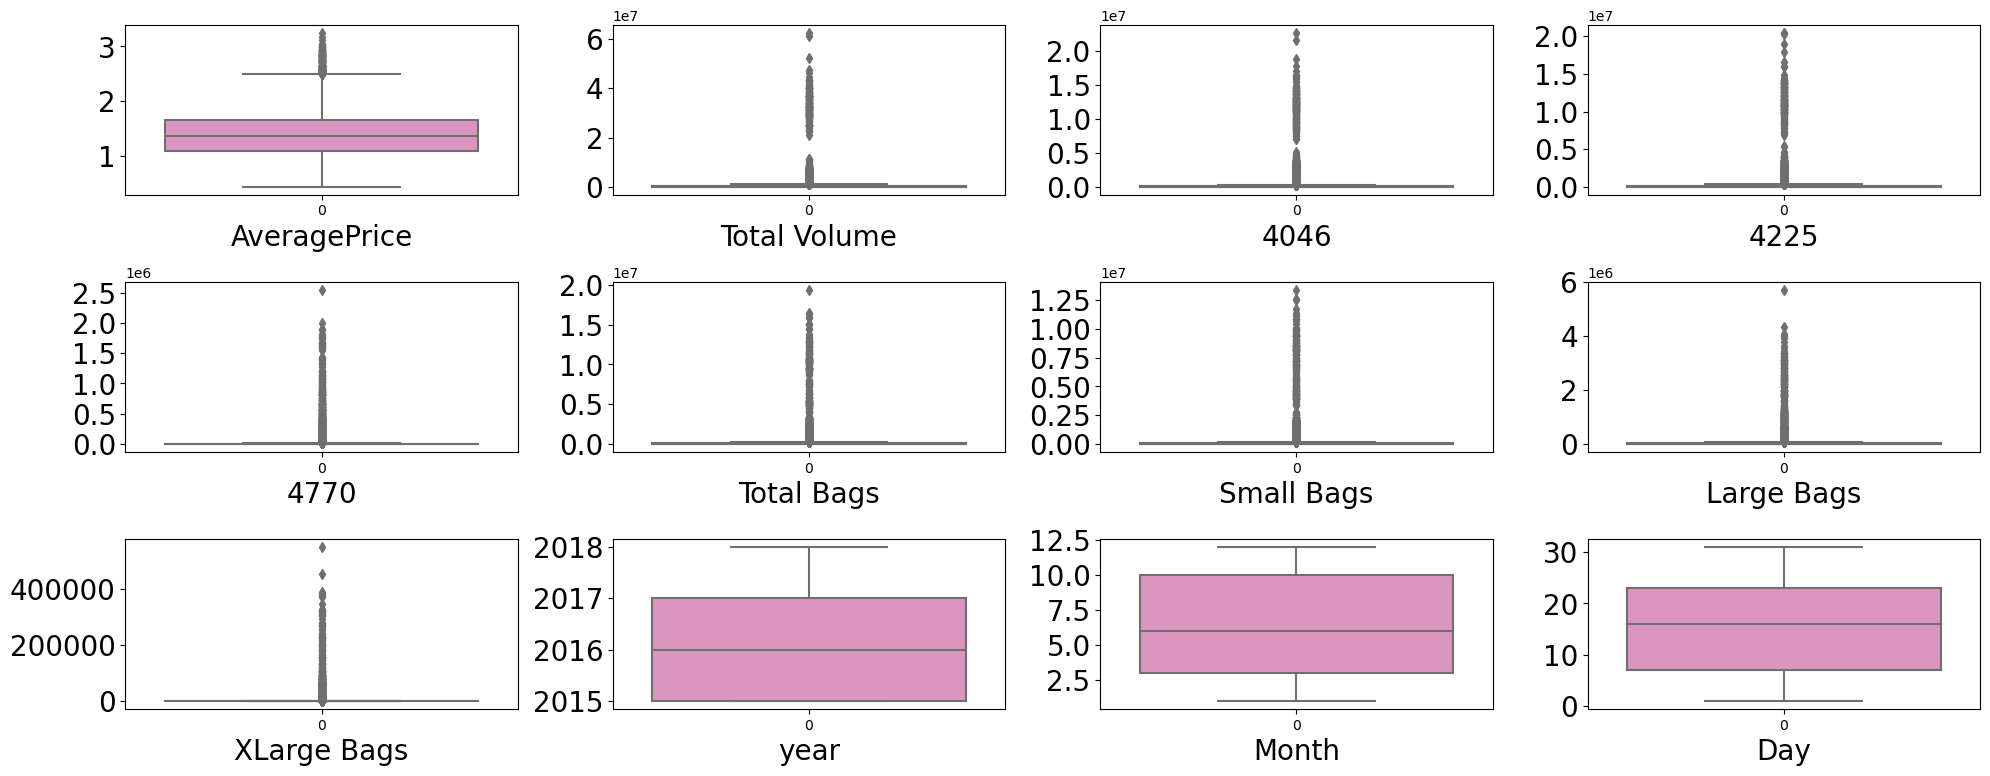

In [44]:

plt.figure(figsize= (20,15), facecolor='white')
plotnumber = 1
for column in numerical_column:
    if plotnumber<=18:
        ax = plt.subplot(6,4, plotnumber)
        sns.boxplot(df[column], palette = 'Set2_r')
        plt.xlabel(column, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

As we can see outliers are present in all the columns except Year month and day. so now we try to remove these outliers using zscore method or IQR technique.

In [45]:
from scipy.stats import zscore
out_features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
z= np.abs(zscore(out_features))
z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [46]:
#threshold=3
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [47]:
#so now removing the data above zscore and creating a new df
df1= df[(z<3).all(axis=1)]
df1.shape

(17782, 14)

In [48]:
print("Data loss percentage- ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage-  2.55904433119623


In [49]:
#now using IQR method

#1st quantile
Q1 = out_features.quantile(0.25)

#3rd quantile
Q3 = out_features.quantile(0.75)

#IQR
IQR = Q3 - Q1

df2= df[~((df <(Q1 - 1.5 * IQR))|(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [50]:
df2.shape

(11747, 14)

In [51]:
print("Data loss percentage- ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data loss percentage-  35.62934955340019


As we see that the zscore method will give the less amount of loss percentage data so we used df1 as our new dataframe

In [52]:
df=df1

In [53]:
df.shape

(17782, 14)

# Checking for skewness

In [54]:
df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

AS we can see the skewness in all the columns except year month and day

In [55]:
# Removing skewness using yeo-johnson method.
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
df[features] = sk.fit_transform(df[features].values)
df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [56]:
#again checking skewness
df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

As we can see that we remove skewness from all the columns only Xlarge bags containing some skewness, lets try to remove it again by log10 method.

In [57]:
df['XLarge Bags']= np.cbrt(df['XLarge Bags'])

In [58]:
df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.779510
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

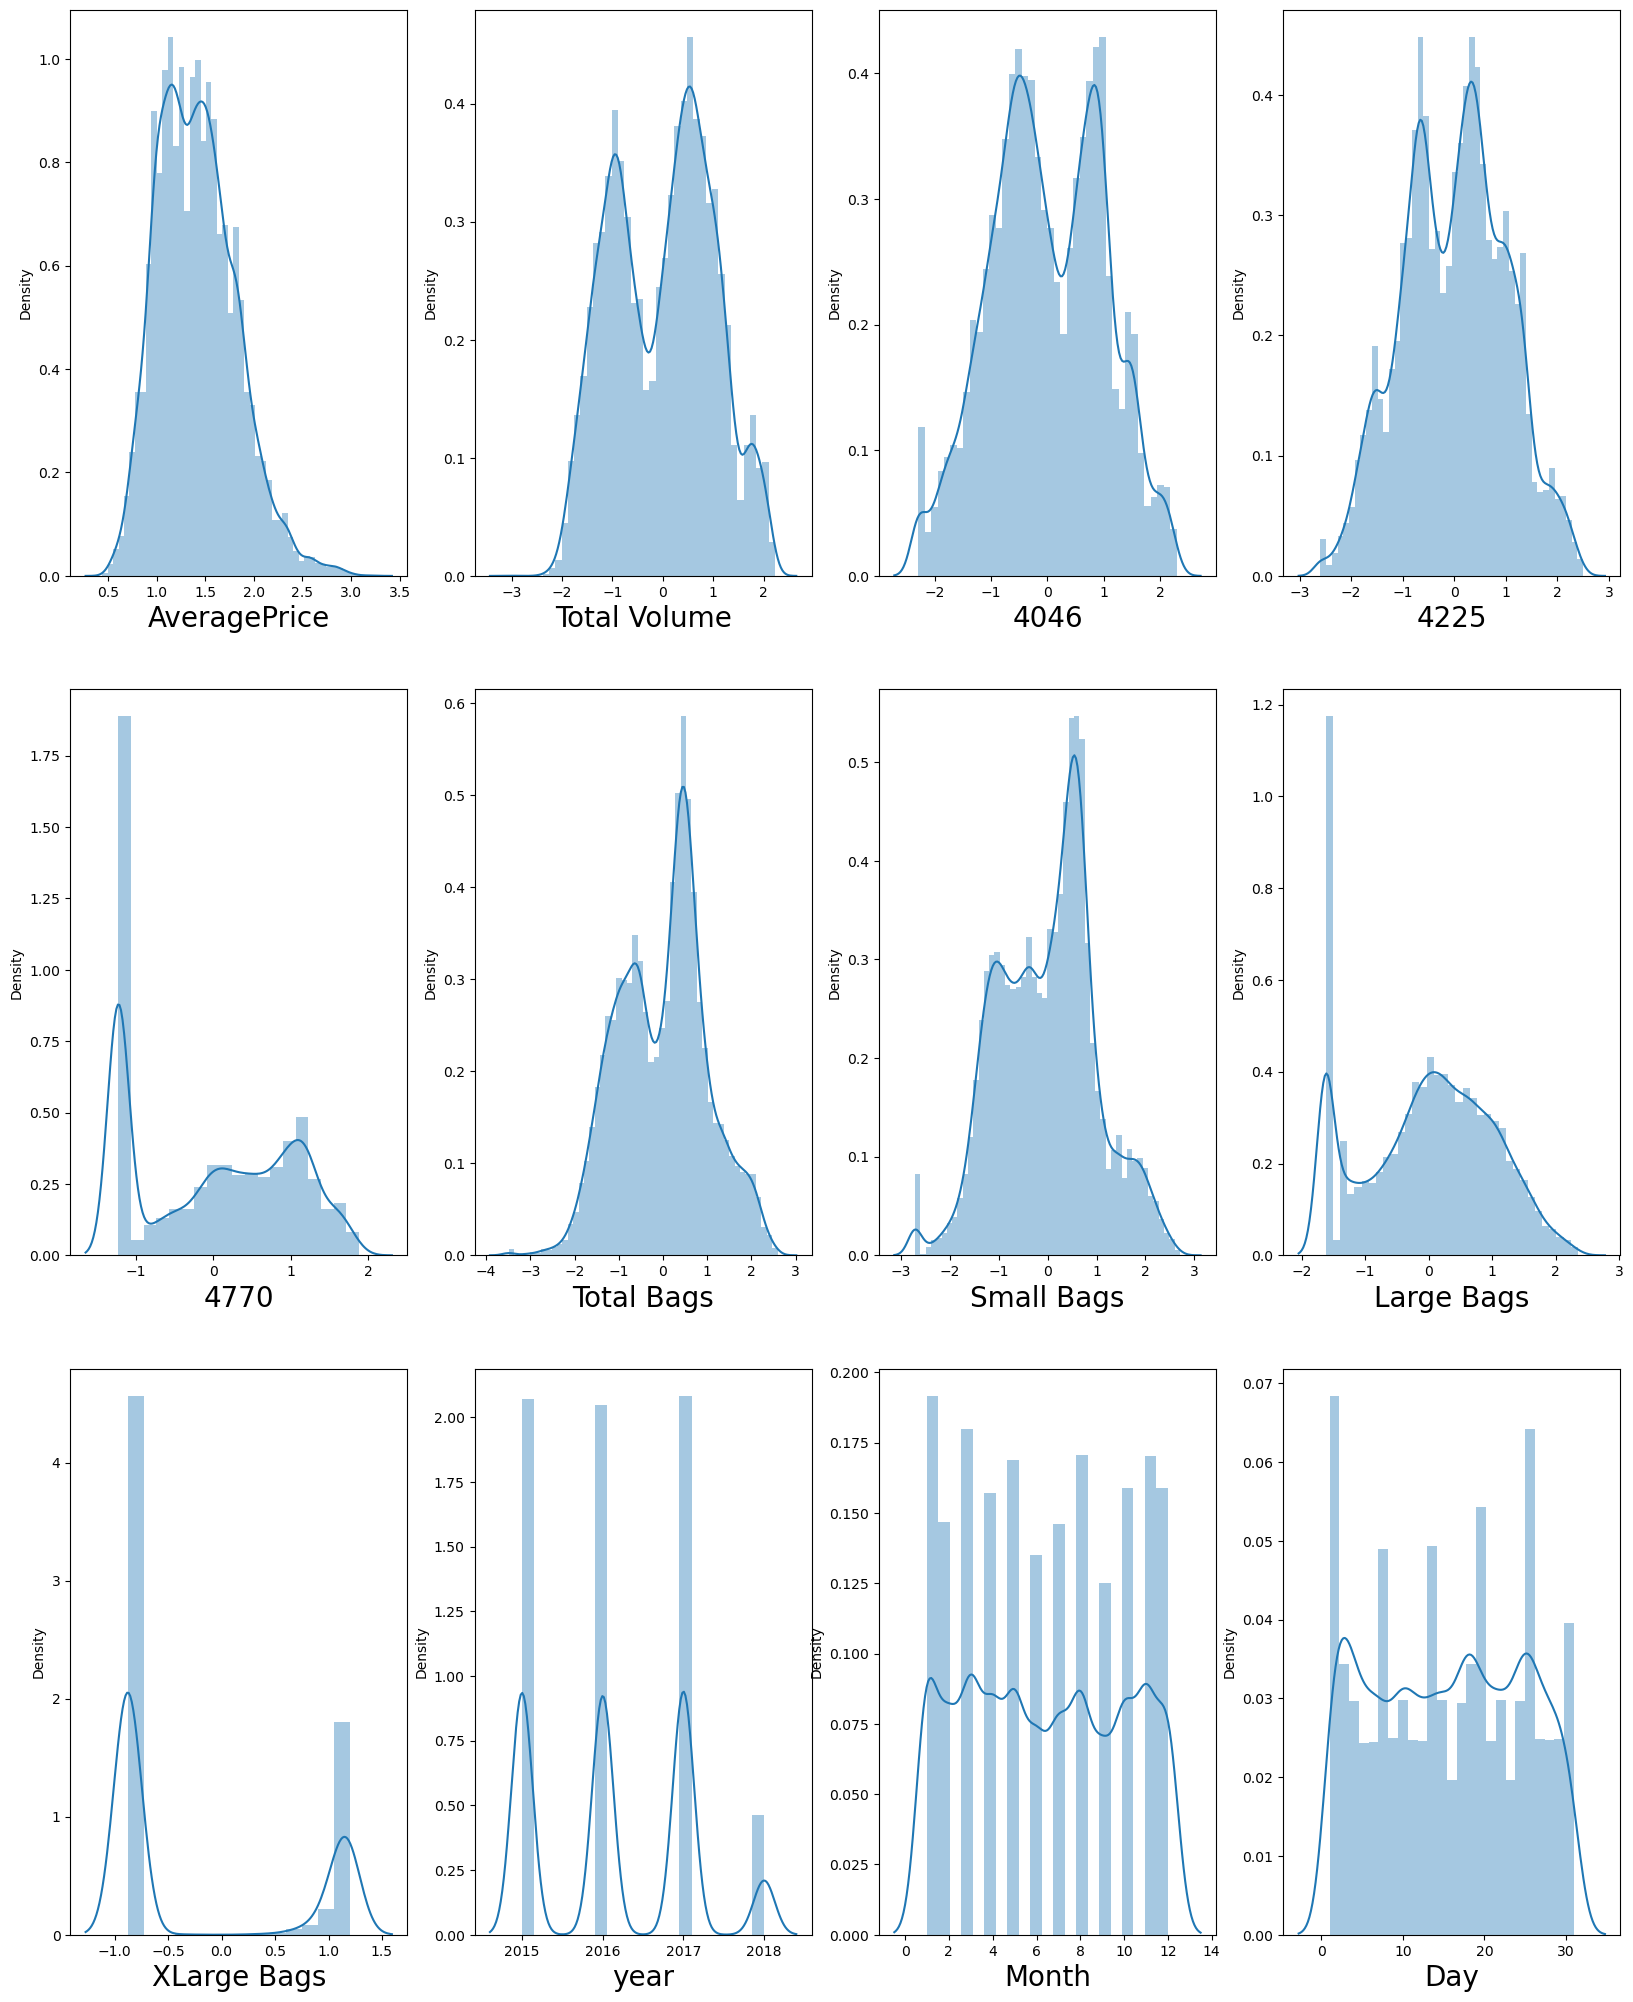

In [59]:
#Visualization for numerical columns

plt.figure(figsize= (20,25))
plotnumber = 1

for column in numerical_column:
    if plotnumber<=15:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

From the above graphs we can see that we remove skewness from all the columns.

# Encoding:

In [60]:
#enconding categorical column using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0       -0.337064   -0.775214    -0.877509   0.0  2015     0.0     12   27  
1       -0.301038   -0.765237    -0.877509   0.0  2015     0.0     12   20  
2       -0.364044   -0.752534    -0.877509   0.0  2015     0.0     12   13  
3       -0.500341   -0.693012    -0.877509   0.0  2015     0.0      6   12  
4       -0.479918   -0.600755    -0.877509   0.0  2015     0.0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244   -0.165765   -0.405895    -0.877509   1.0  2018    53.0      4    2  
18245   -0.321645   -0.478556    -0.877509   1.0  2018    53.0      1   28  
18246   -0.303466   -0.945246    -0.877509   1.0  2018    53.0      1   21  
18247   -0.240252   -0.910471    -0.877509   1.0  2018    53.0      1   14  
18248   -0.201685   -1.042930    -0.877509   1.0  2018    53.0      7    1  

[17782 rows x 14 columns]

# Correlation between target variable and independent variable

In [61]:
#checking correlation between features
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.392807      0.628226  0.574151  0.581432  0.615716   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.071568     -0.015294 -0.014000 -0.019092 -0.012151   
Day               0.058266     -0.010471 -0.009166 -0.008019 -0.000721   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.392807  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.628226 -0.800828   
4046            0.799354    0.778765    0.601899     0.574151 -0.725826   
4225            0.818511    0.784901    0.614878     0.581432 -0.747722   
4770            0.761641    0.754305    0.548457     0.615716 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.610500 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.599339 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.450004 -0.500026   
XLarge Bags     0.610500    0.599339    0.450004     1.000000 -0.672645   
type           -0.725686   -0.720466   -0.500026    -0.672645  1.000000   
year            0.210924    0.185955    0.190295     0.153791  0.007399   
region          0.065996    0.051985    0.086573    -0.016206  0.021970   
Month          -0.004350   -0.002533   -0.004320     0.015810 -0.003290   
Day            -0.007650   -0.003569   -0.005833     0.013017 -0.003108   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.071568  0.058266  
Total Volume  0.076584  0.065709 -0.015294 -0.010471  
4046         -0.002396  0.159390 -0.014000 -0.009166  
4225         -0.004533  0.032273 -0.019092 -0.008019  
4770         -0.051657  0.037805 -0.012151 -0.000721  
Total Bags    0.210924  0.065996 -0.004350 -0.007650  
Small Bags    0.185955  0.051985 -0.002533 -0.003569  
Large Bags    0.190295  0.086573 -0.004320 -0.005833  
XLarge Bags   0.153791 -0.016206  0.015810  0.013017  
type          0.007399  0.021970 -0.003290 -0.003108  
year          1.000000 -0.003610 -0.098248 -0.025666  
region       -0.003610  1.000000  0.001784  0.000890  
Month        -0.098248  0.001784  1.000000 -0.045512  
Day          -0.025666  0.000890 -0.045512  1.000000

This gives the correlation between independent variable and target variable. Lets visualize this by plotting heatmap

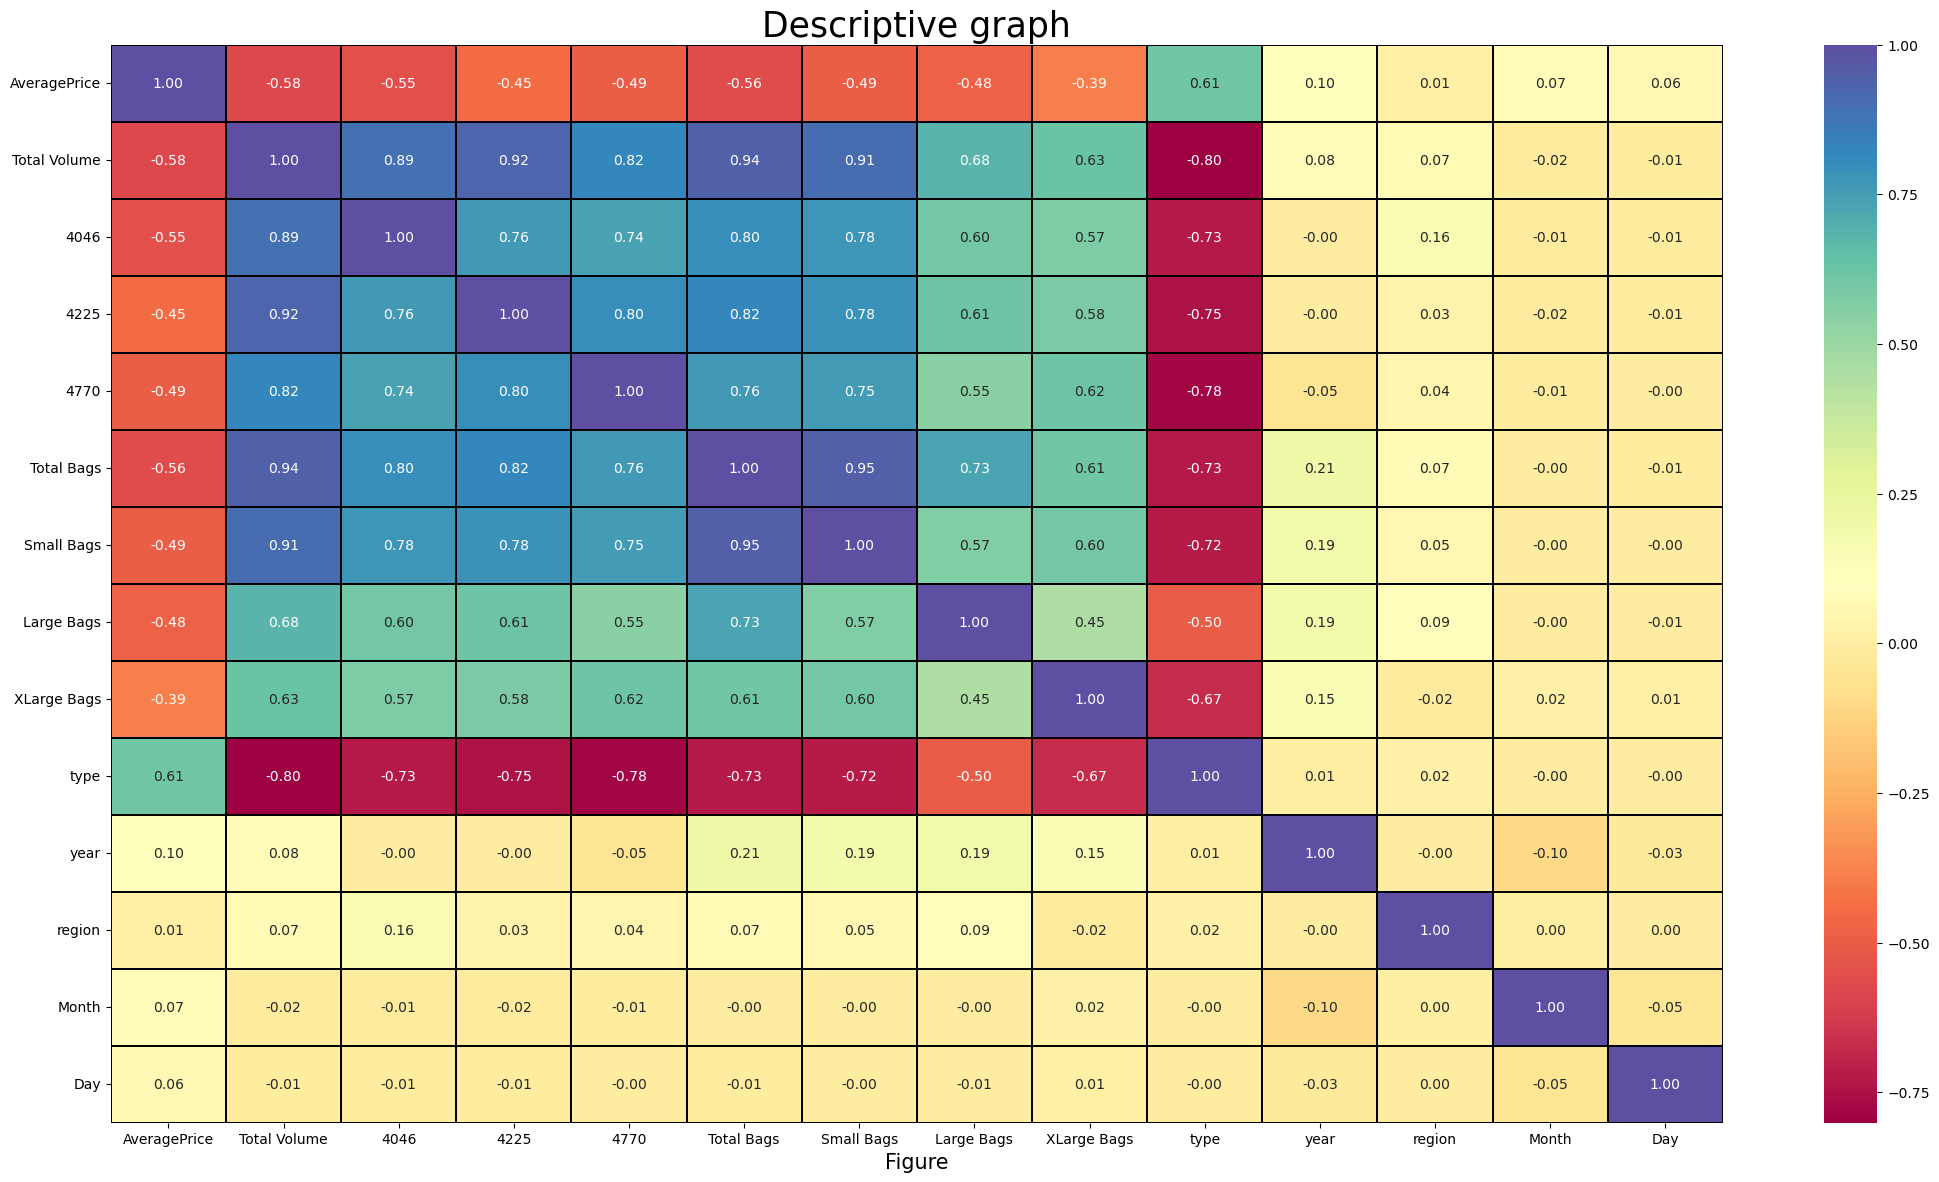

In [62]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.title('Descriptive graph', fontsize=25)
plt.show()

From the above Heatmap we can observed that
1) All the independent variable are negatively correlated to the target variable except year, day and month.
2) Also we can see that the column day has no relation with the traget variable 'Type', so we remove this variable later.
3) As we can see all the features are coorelated to each other, this will indicates the multicollinerity, we will solve this problem using VIF method.
4) Also many of the columns does not any relation to each other.

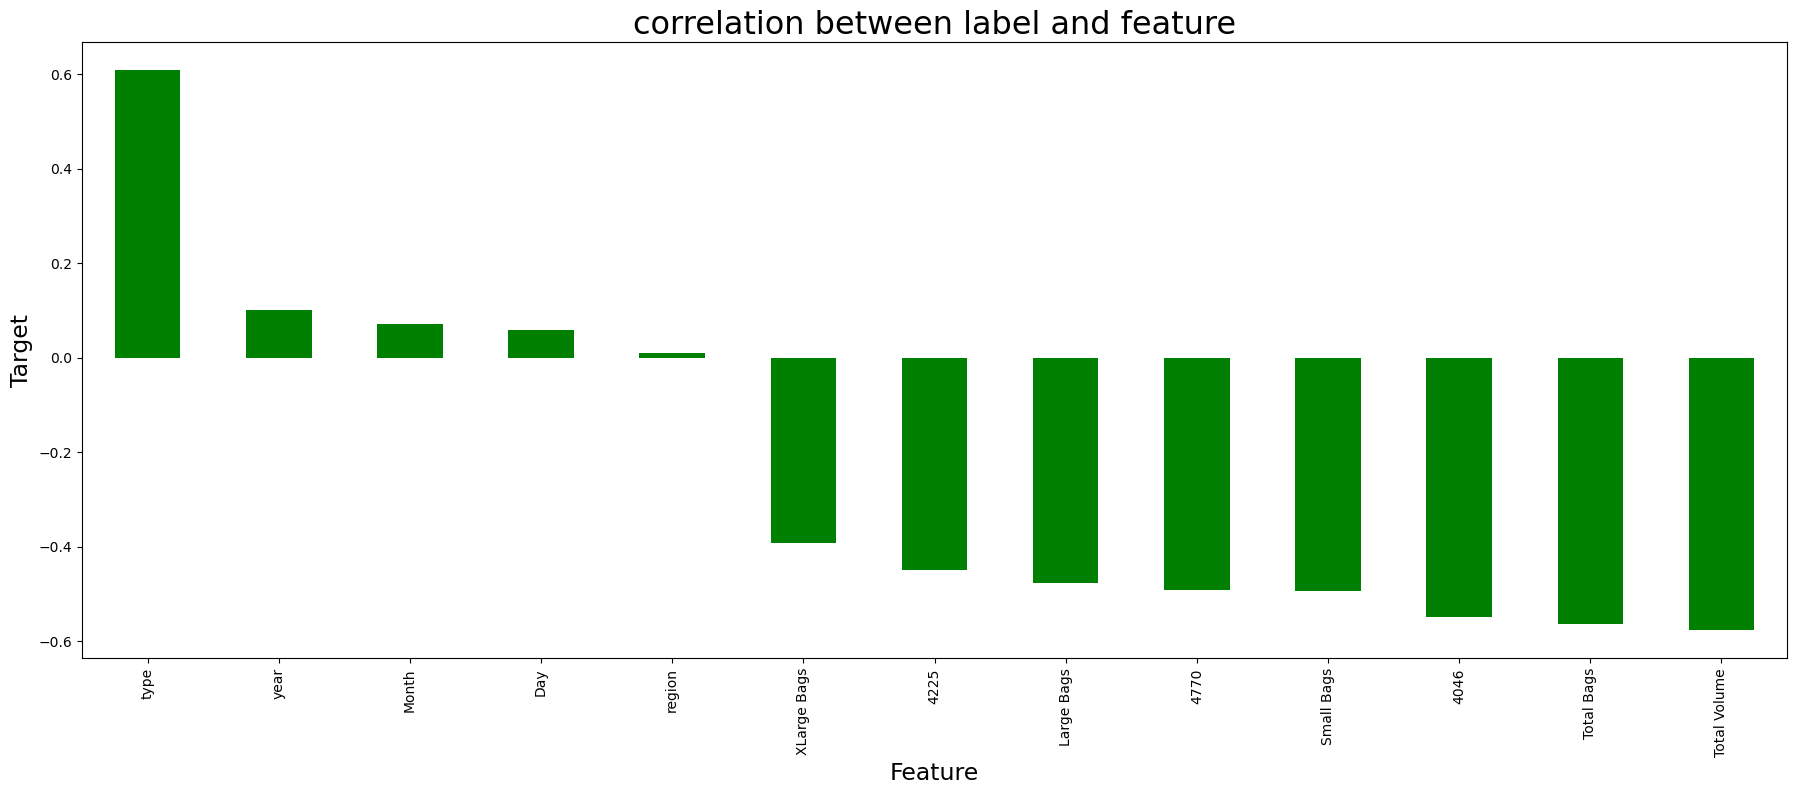

In [63]:
#visualizing the correlation between target and label using bar plot
plt.figure(figsize=(22,8))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind="bar",color="g")
plt.xlabel("Feature", fontsize = 17)
plt.ylabel("Target", fontsize= 17)
plt.title("correlation between label and feature", fontsize = 23)
plt.show()

As we can see that the column Type has strong correlation with the average price, while the region has less relationship with the target variable.so we can drop these column.

In [64]:
#before dropping the region column we can save these data for our classification model
class_df = df

In [65]:
class_df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0       -0.337064   -0.775214    -0.877509   0.0  2015     0.0     12   27  
1       -0.301038   -0.765237    -0.877509   0.0  2015     0.0     12   20  
2       -0.364044   -0.752534    -0.877509   0.0  2015     0.0     12   13  
3       -0.500341   -0.693012    -0.877509   0.0  2015     0.0      6   12  
4       -0.479918   -0.600755    -0.877509   0.0  2015     0.0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244   -0.165765   -0.405895    -0.877509   1.0  2018    53.0      4    2  
18245   -0.321645   -0.478556    -0.877509   1.0  2018    53.0      1   28  
18246   -0.303466   -0.945246    -0.877509   1.0  2018    53.0      1   21  
18247   -0.240252   -0.910471    -0.877509   1.0  2018    53.0      1   14  
18248   -0.201685   -1.042930    -0.877509   1.0  2018    53.0      7    1  

[17782 rows x 14 columns]

In [66]:
#Dropping Irrelavant column
df.drop('region', axis=1, inplace=True)

In [67]:
df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  Month  Day  
0   -0.337064   -0.775214    -0.877509   0.0  2015     12   27  
1   -0.301038   -0.765237    -0.877509   0.0  2015     12   20  
2   -0.364044   -0.752534    -0.877509   0.0  2015     12   13  
3   -0.500341   -0.693012    -0.877509   0.0  2015      6   12  
4   -0.479918   -0.600755    -0.877509   0.0  2015     11   29

# Seprating Feature and Label variable

In [68]:
x=df.drop("AveragePrice", axis=1)
y=df["AveragePrice"]

# Feature scaling using standard scalarization

In [69]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year     Month       Day  
0       -0.775214    -0.687157 -1.026443 -1.214908  1.592359  1.281242  
1       -0.765237    -0.687157 -1.026443 -1.214908  1.592359  0.501783  
2       -0.752534    -0.687157 -1.026443 -1.214908  1.592359 -0.277677  
3       -0.693012    -0.687157 -1.026443 -1.214908 -0.108942 -0.389028  
4       -0.600755    -0.687157 -1.026443 -1.214908  1.308809  1.503945  
...           ...          ...       ...       ...       ...       ...  
17777   -0.405895    -0.687157  0.974238  1.979143 -0.676043 -1.502542  
17778   -0.478556    -0.687157  0.974238  1.979143 -1.526694  1.392594  
17779   -0.945246    -0.687157  0.974238  1.979143 -1.526694  0.613134  
17780   -0.910471    -0.687157  0.974238  1.979143 -1.526694 -0.166326  
17781   -1.042930    -0.687157  0.974238  1.979143  0.174608 -1.613894  

[17782 rows x 12 columns]

We have scaled the data using standard scalarization to overcome the issue of biasness

# Checking Variance Inflation Factor(VIF)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for  i in range(len(x.columns))]
vif["Features"]= x.columns
vif

VIF values      Features
0    51.738305  Total Volume
1     6.806211          4046
2    11.155438          4225
3     3.941789          4770
4    34.398757    Total Bags
5    16.629062    Small Bags
6     3.462454    Large Bags
7     2.052826   XLarge Bags
8     3.725425          type
9     1.345193          year
10    1.022368         Month
11    1.004867           Day

Threshold value=10
By checking VIF values we can find the feature causing the multicollinarity problem. here we can find that The columns Total Volume, Total Bags and Small Bags have VIF value greater than 10.so we will drop one of the column first,if the same problem persist then we will trying to remove other higher vif value column.

In [71]:
#dropping Total Volume column
#x.drop("Total Volume",axis=1, inplace=True)

In [72]:
#again checking vif values
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for  i in range(len(x.columns))]
vif["Features"]= x.columns
vif

VIF values      Features
0    51.738305  Total Volume
1     6.806211          4046
2    11.155438          4225
3     3.941789          4770
4    34.398757    Total Bags
5    16.629062    Small Bags
6     3.462454    Large Bags
7     2.052826   XLarge Bags
8     3.725425          type
9     1.345193          year
10    1.022368         Month
11    1.004867           Day

In [73]:
#dropping Total Bags column
x.drop("Total Bags",axis=1, inplace=True)

In [74]:
#again checking vif values
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for  i in range(len(x.columns))]
vif["Features"]= x.columns
vif

VIF values      Features
0    36.810005  Total Volume
1     6.071956          4046
2     9.966720          4225
3     3.939309          4770
4     7.653796    Small Bags
5     2.106782    Large Bags
6     2.050607   XLarge Bags
7     3.680912          type
8     1.322034          year
9     1.021528         Month
10    1.004863           Day

AS we can see that we solved the problem of multicolineraity, so we move ahed for model building

# Modelling

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

Finding the best random State

In [76]:
# creating train test split
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is", maxAccu,"On Random State", maxRs)
    

Maximum r2 score is 0.9143236847585332 On Random State 132


The best accuracy score is 91.43% at random state 132

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state = maxRs)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [79]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_LR)))


# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5367117222361771
R2_score on training data: 51.62684848230656
Mean Absolute Error: 0.2106288690970703
Mean Squared Error: 0.07237011184727643
Root Mean Squared Error: 0.2690169359859643
Cross_Validaton_Score 0.19178415141387634


In [80]:
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_score: 0.8308812387326762
R2_score on training data: 97.56862717900813
Mean Absolute Error: 0.2106288690970703
Mean Squared Error: 0.02641798693345829
Root Mean Squared Error: 0.16253610962939372
Cross_Validaton_Score 0.23771924872206798


In [81]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print("R2_score:" , r2_score(y_test,pred_knn))
print("R2_score on training data: ", r2_score(y_train,pred_train)*100)
print("Mean Aboslute Error:", mean_absolute_error(y_test,pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, pred_knn))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred_knn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_score: 0.730649884744208
R2_score on training data:  82.99328720310879
Mean Aboslute Error: 0.15102343017806935
Mean Squared Error: 0.042075094283036546
Root Mean Squared Error: 0.20512214478948038
Cross_Validaton_Score 0.14728971050434117


In [82]:
gbr= GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
pred_train = gbr.predict(x_train)
print("R2_score:", r2_score(y_test, pred_gbr))
print("R2_score on training Data:", r2_score(y_train, pred_train)*100)
print("Mean Aboslute Error:", mean_absolute_error(y_test,pred_gbr))
print("Mean Squared Error:", mean_squared_error(y_test, pred_gbr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred_gbr)))


# Checking cv score for GradientBoostingRegressor
print("Cross_Validaton_Score",cross_val_score(gbr,x,y,cv=5).mean())

R2_score: 0.6992751915848512
R2_score on training Data: 70.98178821941298
Mean Aboslute Error: 0.16624383320931033
Mean Squared Error: 0.04697612494169296
Root Mean Squared Error: 0.21673976317624083
Cross_Validaton_Score 0.33596715320799664


In [83]:
rd= Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print("R2_score:", r2_score(y_test, pred_rd))
print("R2_score on training Data:", r2_score(y_train, pred_train)*100)
print("Mean Aboslute Error:", mean_absolute_error(y_test,pred_rd))
print("Mean Squared Error:", mean_squared_error(y_test, pred_rd))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred_rd)))


# Checking cv score for Ridge
print("Cross_Validaton_Score",cross_val_score(rd,x,y,cv=5).mean())

R2_score: 0.5367060813137414
R2_score on training Data: 51.62678802189342
Mean Aboslute Error: 0.21062768113020622
Mean Squared Error: 0.07237099301394347
Root Mean Squared Error: 0.26901857373412613
Cross_Validaton_Score 0.19170299314810565


In [84]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = rd.predict(x_train)
print("R2_score:", r2_score(y_test, pred_dtr))
print("R2_score on training Data:", r2_score(y_train, pred_train)*100)
print("Mean Aboslute Error:", mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error:", mean_squared_error(y_test, pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred_dtr)))


# Checking cv score for DecisionTreeRegtressor
print("Cross_Validaton_Score",cross_val_score(dtr,x,y,cv=5).mean())

R2_score: 0.5945662740668058
R2_score on training Data: 51.62678802189342
Mean Aboslute Error: 0.16569447047797564
Mean Squared Error: 0.0633326710402999
Root Mean Squared Error: 0.2516598319960893
Cross_Validaton_Score -0.35537004486922935


In [85]:
tr= ExtraTreesRegressor()
tr.fit(x_train, y_train)
pred_tr = tr.predict(x_test)
pred_train = tr.predict(x_train)
print("R2_score:", r2_score(y_test, pred_tr))
print("R2_score on training Data:", r2_score(y_train, pred_train)*100)
print("Mean Aboslute Error:", mean_absolute_error(y_test,pred_tr))
print("Mean Squared Error:", mean_squared_error(y_test, pred_tr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred_tr)))

# Checking cv score for ExtraTreeRegressor
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_score: 0.8532165533895284
R2_score on training Data: 100.0
Mean Aboslute Error: 0.10660594189315839
Mean Squared Error: 0.022928994663542642
Root Mean Squared Error: 0.15142323026386223
Cross_Validaton_Score 0.2312040404015247


In [86]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
pred_train = xgb.predict(x_train)
print("R2_score:", r2_score(y_test, pred_xgb))
print("R2_score on training Data:", r2_score(y_train, pred_train)*100)
print("Mean Aboslute Error:", mean_absolute_error(y_test,pred_xgb))
print("Mean Squared Error:", mean_squared_error(y_test, pred_xgb))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred_xgb)))

# Checking cv score for Xgb
print("Cross_Validaton_Score",cross_val_score(xgb,x,y,cv=5).mean())

R2_score: 0.8456047687059943
R2_score on training Data: 94.43392660085486
Mean Aboslute Error: 0.11423425966953717
Mean Squared Error: 0.024118029084106096
Root Mean Squared Error: 0.15529980387658607
Cross_Validaton_Score 0.33905945536181087


In [87]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
pred_ada = ada.predict(x_test)
pred_train = ada.predict(x_train)
print("R2_score:", r2_score(y_test, pred_ada))
print("R2_score on training Data:", r2_score(y_train, pred_train)*100)
print("Mean Aboslute Error:", mean_absolute_error(y_test,pred_ada))
print("Mean Squared Error:", mean_squared_error(y_test, pred_ada))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, pred_ada)))

# Checking cv score for AdaBoostRegressor
print("Cross_Validaton_Score",cross_val_score(ada,x,y,cv=5).mean())

R2_score: 0.5239935011374341
R2_score on training Data: 53.6181999212355
Mean Aboslute Error: 0.22065931658224344
Mean Squared Error: 0.07435682104669122
Root Mean Squared Error: 0.27268447159068526
Cross_Validaton_Score -0.04646772556325025


# conclusion

# As the cross validation score is less in KNN model, so KNN is our best performing model with the R2 score 73.06%

# Hyper Parameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters = {'n_neighbors':[2,5,9,10],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}

In [90]:
GCV=GridSearchCV(KNN(),parameters, cv=5)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 5, 9, 10],
                         'weights': ['uniform', 'distance']})

In [92]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}

In [93]:
Final_model = KNN(algorithm='auto', leaf_size=10, n_neighbors=5, weights='distance')
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score:', r2_score(y_test, pred))
print("Mean_absolute_error:", mean_absolute_error(y_test,pred))
print("Mean Squared Error:", mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.7408536124487397
Mean_absolute_error: 0.14771812857671113
Mean Squared Error: 0.04048117328248716
Root Mean Squared Error: 0.20119933718202743


# so the best R2 score for final model is 74.08%

# Saving the model

In [94]:
#saving the model using.pkl
import joblib
joblib.dump(Final_model, "avacado.pkl")

['avacado.pkl']

In [95]:
import pickle
filename='avacado.pkl'
pickle.dump(Final_model,open(filename,'wb'))

In [96]:
import pickle
loaded_model= pickle.load(open('avacado.pkl', 'rb'))
result= loaded_model.score(x_test,y_test)
print(result*100)

74.08536124487397


In [97]:
conclusion= pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=["Predicted", "Original"])
conclusion

0         1        2        3         4         5         6     \
Predicted  0.843273  1.817173  0.90891  1.22102  1.751526  1.060966  0.925132   
Original   0.820000  2.000000  0.97000  1.21000  1.840000  1.080000  0.880000   

               7         8         9     ...      5325      5326      5327  \
Predicted  1.566026  2.008878  1.329208  ...  2.218476  0.860044  1.360243   
Original   1.400000  2.540000  1.030000  ...  1.720000  0.620000  1.280000   

               5328      5329      5330      5331      5332      5333  \
Predicted  1.756813  1.234323  1.869551  1.616366  1.470746  1.563624   
Original   1.950000  1.200000  1.460000  1.730000  1.290000  2.620000   

               5334  
Predicted  1.705299  
Original   1.850000  

[2 rows x 5335 columns]

# Classification Problem(Region as a target variable)

# importing Dataset

In [98]:
df1= pd.read_csv('avacado.csv')

In [99]:
df1

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1               1  20-12-2015          1.35      54876.98   674.28   44638.81   
2               2  13-12-2015          0.93     118220.22   794.70  109149.67   
3               3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4               4  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  04-02-2018          1.63      17074.83  2046.96    1529.20   
18245           8  28-01-2018          1.71      13888.04  1191.70    3431.50   
18246           9  21-01-2018          1.87      13766.76  1191.92    2452.79   
18247          10  14-01-2018          1.93      16205.22  1527.63    2981.04   
18248          11  07-01-2018          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [100]:
df1.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1           1  20-12-2015          1.35      54876.98   674.28   44638.81   
2           2  13-12-2015          0.93     118220.22   794.70  109149.67   
3           3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4           4  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [101]:
df1['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [102]:
df1['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [103]:
df1.shape

(18249, 14)

In [104]:
class_df = df1

# Encoding the categorical columns using Label Encoding

In [105]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
class_df[categorical_col]= class_df[categorical_col].apply(LE.fit_transform)
class_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[18249 rows x 2 columns]

# correlation between target variable and independent variable


In [106]:
class_df.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.014035  0.017628  0.019829   
AveragePrice   -0.133008      1.000000     -0.192752 -0.208317 -0.172928   
Total Volume    0.014035     -0.192752      1.000000  0.977863  0.974181   
4046            0.017628     -0.208317      0.977863  1.000000  0.926110   
4225            0.019829     -0.172928      0.974181  0.926110  1.000000   
4770            0.041752     -0.179446      0.872202  0.833389  0.887855   
Total Bags     -0.002219     -0.177088      0.963047  0.920057  0.905787   
Small Bags      0.000347     -0.174730      0.967238  0.925280  0.916031   
Large Bags     -0.009196     -0.172940      0.880640  0.838645  0.810015   
XLarge Bags    -0.011546     -0.117592      0.747157  0.699377  0.688809   
type           -0.000288      0.615845     -0.232434 -0.225819 -0.232289   
year           -0.171667      0.093197      0.017193  0.003353 -0.009559   
region         -0.000489     -0.011716      0.174176  0.192073  0.145726   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.041752   -0.002219    0.000347   -0.009196    -0.011546   
AveragePrice -0.179446   -0.177088   -0.174730   -0.172940    -0.117592   
Total Volume  0.872202    0.963047    0.967238    0.880640     0.747157   
4046          0.833389    0.920057    0.925280    0.838645     0.699377   
4225          0.887855    0.905787    0.916031    0.810015     0.688809   
4770          1.000000    0.792314    0.802733    0.698471     0.679861   
Total Bags    0.792314    1.000000    0.994335    0.943009     0.804233   
Small Bags    0.802733    0.994335    1.000000    0.902589     0.806845   
Large Bags    0.698471    0.943009    0.902589    1.000000     0.710858   
XLarge Bags   0.679861    0.804233    0.806845    0.710858     1.000000   
type         -0.210027   -0.217788   -0.220535   -0.193177    -0.175483   
year         -0.036531    0.071552    0.063915    0.087891     0.081033   
region        0.095252    0.175256    0.164702    0.198768     0.082281   

                  type      year    region  
Unnamed: 0   -0.000288 -0.171667 -0.000489  
AveragePrice  0.615845  0.093197 -0.011716  
Total Volume -0.232434  0.017193  0.174176  
4046         -0.225819  0.003353  0.192073  
4225         -0.232289 -0.009559  0.145726  
4770         -0.210027 -0.036531  0.095252  
Total Bags   -0.217788  0.071552  0.175256  
Small Bags   -0.220535  0.063915  0.164702  
Large Bags   -0.193177  0.087891  0.198768  
XLarge Bags  -0.175483  0.081033  0.082281  
type          1.000000 -0.000032 -0.000280  
year         -0.000032  1.000000 -0.000055  
region       -0.000280 -0.000055  1.000000

# This gives the correlation between dependent and independent variables, lets visualize it using a heat map also

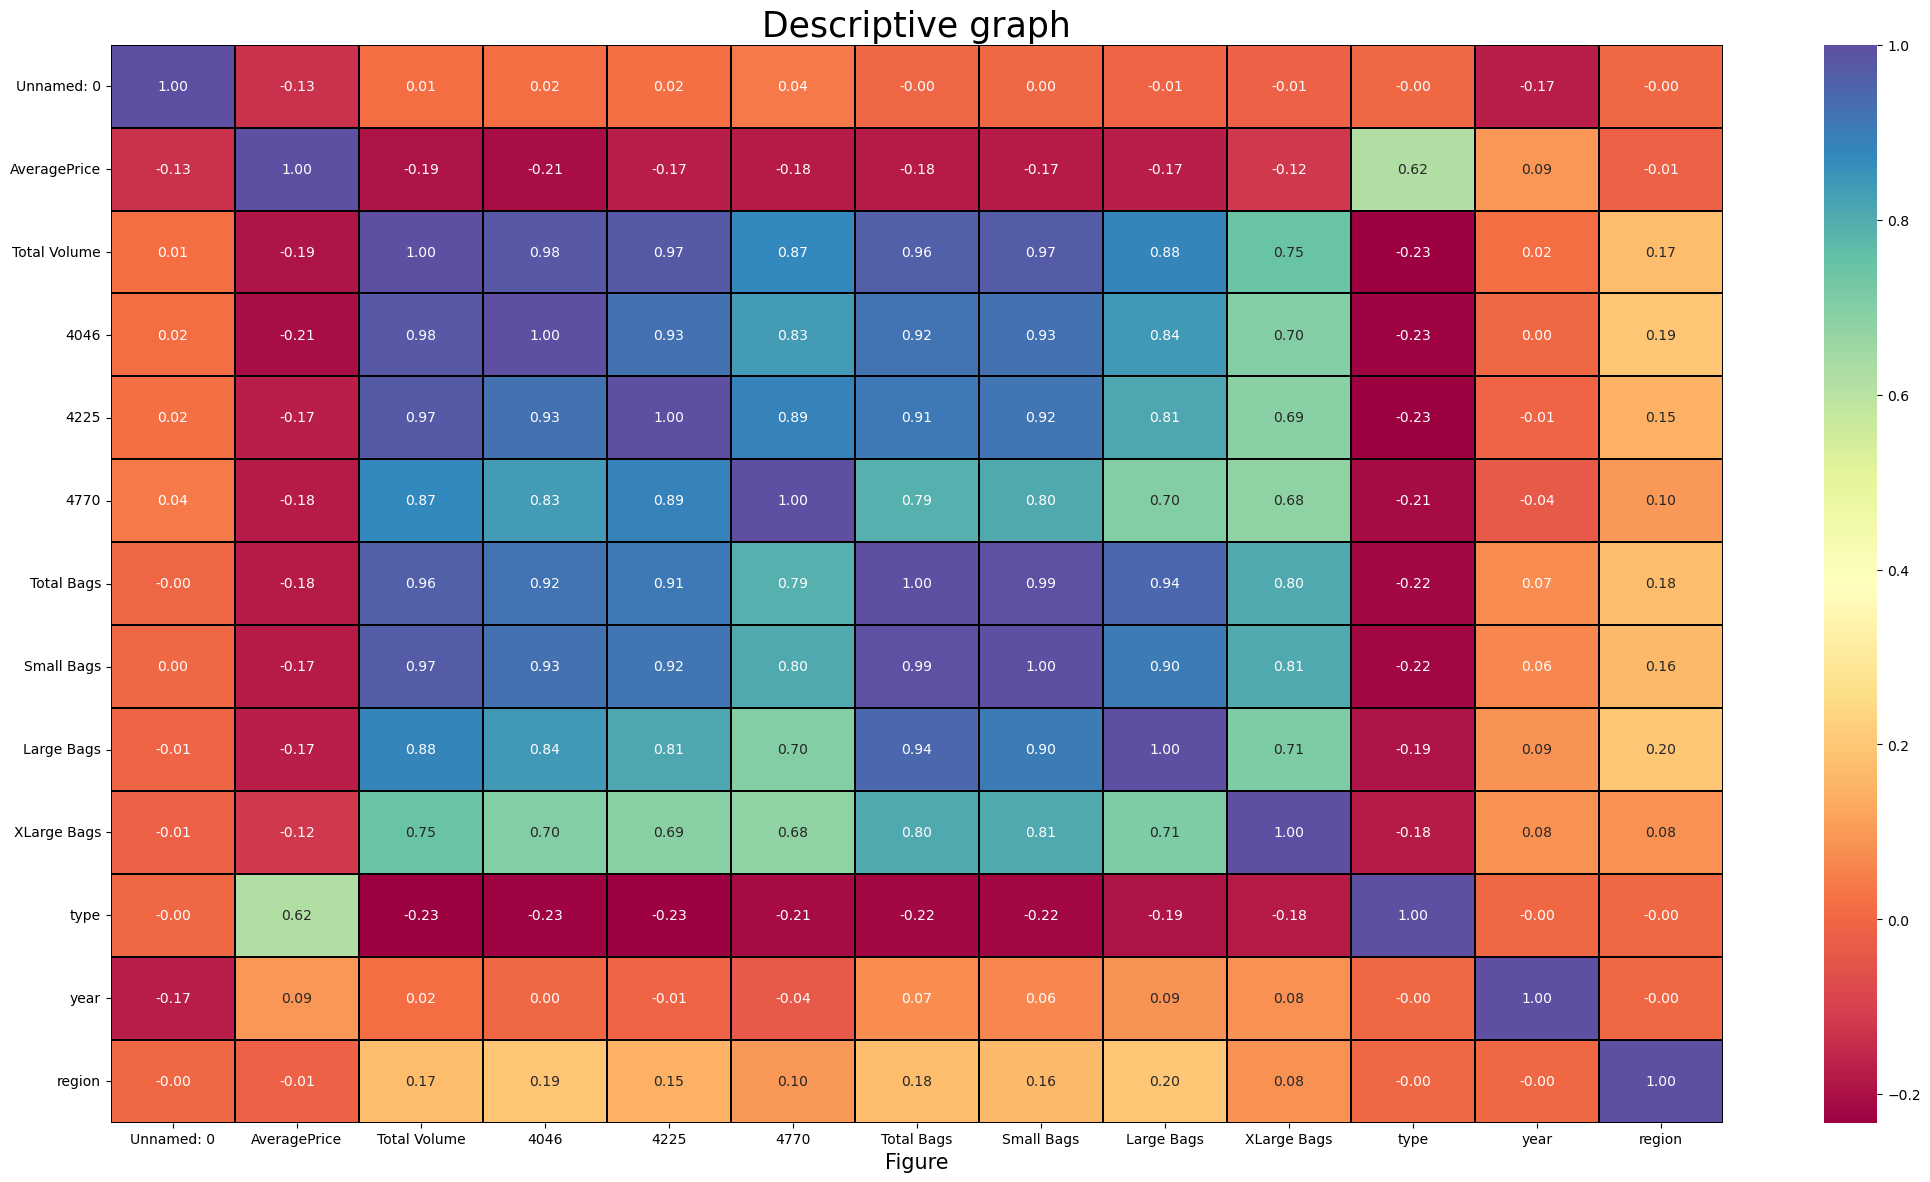

In [107]:
plt.figure(figsize=(26,14))
sns.heatmap(class_df.corr(),annot=True, fmt='0.2f', linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.title('Descriptive graph', fontsize=25)
plt.show()

From the above heatmap we can observed that many of the columns are strongly related to each other, which will increase the problem of multicollinerity, we will deal with it using a VIF method.

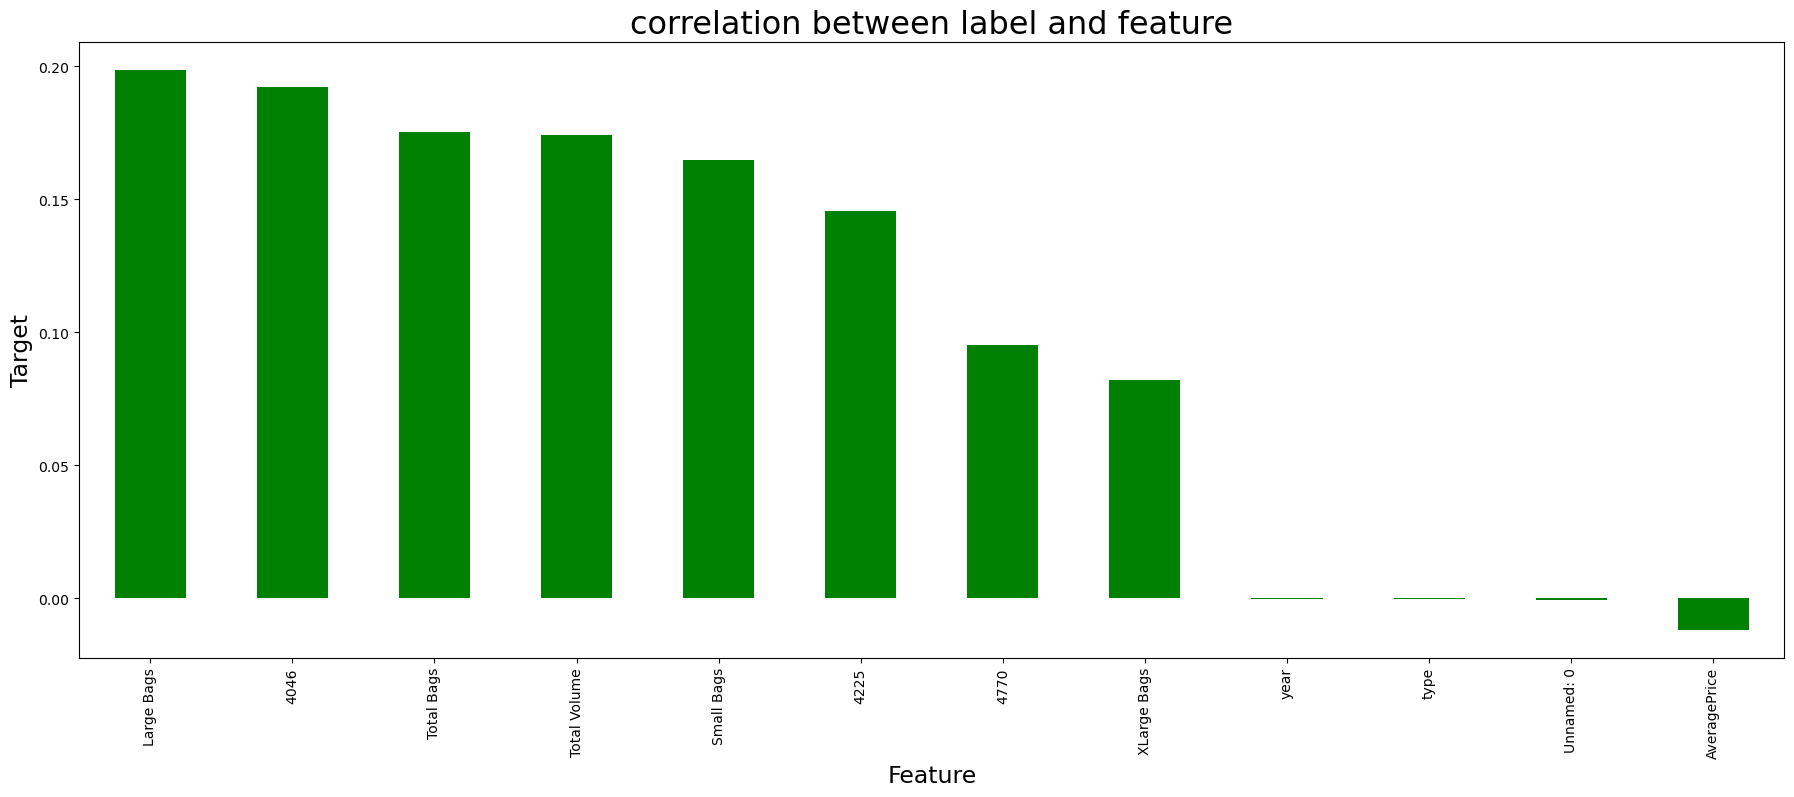

In [108]:
#visualizing the correlation between target and label using bar plot
plt.figure(figsize=(22,8))
class_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind="bar",color="g")
plt.xlabel("Feature", fontsize = 17)
plt.ylabel("Target", fontsize= 17)
plt.title("correlation between label and feature", fontsize = 23)
plt.show()

As we can see that some of the column are irrelavent such as year, we are dropping this column.

In [109]:
# dropping irrelavent column
class_df.drop("Date",axis=1, inplace=True)
class_df.drop("year",axis=1, inplace=True)

# Seprating Feature and Label

In [110]:
x = class_df.drop("region", axis=1)
y = class_df["region"]
x

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  
0         8696.87     8603.62       93.25          0.0     0  
1         9505.56     9408.07       97.49          0.0     0  
2         8145.35     8042.21      103.14          0.0     0  
3         5811.16     5677.40      133.76          0.0     0  
4         6183.95     5986.26      197.69          0.0     0  
...           ...         ...         ...          ...   ...  
18244    13498.67    13066.82      431.85          0.0     1  
18245     9264.84     8940.04      324.80          0.0     1  
18246     9394.11     9351.80       42.31          0.0     1  
18247    10969.54    10919.54       50.00          0.0     1  
18248    12014.15    11988.14       26.01          0.0     1  

[18249 rows x 11 columns]

# Feature scaling and standard scalarization


In [111]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
0       -1.565327     -0.188689     -0.227716 -0.230816 -0.199902 -0.212091   
1       -1.500730     -0.139020     -0.230427 -0.231103 -0.208054 -0.211997   
2       -1.436133     -1.182069     -0.212085 -0.231007 -0.154478 -0.211325   
3       -1.371536     -0.809551     -0.223444 -0.230741 -0.185350 -0.211864   
4       -1.306939     -0.312861     -0.231538 -0.230891 -0.208719 -0.211834   
...           ...           ...           ...       ...       ...       ...   
18244   -1.113149      0.556347     -0.241373 -0.230017 -0.243857 -0.212540   
18245   -1.048552      0.755023     -0.242296 -0.230693 -0.242277 -0.212540   
18246   -0.983955      1.152375     -0.242331 -0.230693 -0.243090 -0.205766   
18247   -0.919358      1.301382     -0.241625 -0.230428 -0.242651 -0.205774   
18248   -0.854761      0.531512     -0.241253 -0.229347 -0.243170 -0.210450   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type  
0       -0.234170   -0.232647   -0.222352     -0.17558 -0.999836  
1       -0.233350   -0.231568   -0.222335     -0.17558 -0.999836  
2       -0.234730   -0.233399   -0.222311     -0.17558 -0.999836  
3       -0.237096   -0.236568   -0.222186     -0.17558 -0.999836  
4       -0.236718   -0.236154   -0.221924     -0.17558 -0.999836  
...           ...         ...         ...          ...       ...  
18244   -0.229301   -0.226665   -0.220964     -0.17558  1.000164  
18245   -0.233594   -0.232196   -0.221403     -0.17558  1.000164  
18246   -0.233463   -0.231644   -0.222561     -0.17558  1.000164  
18247   -0.231866   -0.229543   -0.222529     -0.17558  1.000164  
18248   -0.230807   -0.228111   -0.222628     -0.17558  1.000164  

[18249 rows x 11 columns]

We have scaled the data using standard scalarization method to overcome the issue of biasness

# Checking Variance Inflation Factor(VIF)

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for  i in range(len(x.columns))]
vif["Features"]= x.columns
vif

VIF values      Features
0   1.036026e+00    Unnamed: 0
1   1.708597e+00  AveragePrice
2   4.919440e+09  Total Volume
3   6.600171e+08          4046
4   5.980301e+08          4225
5   4.763436e+06          4770
6   2.370316e+14    Total Bags
7   1.364727e+14    Small Bags
8   1.448103e+13    Large Bags
9   7.621400e+10   XLarge Bags
10  1.689393e+00          type

In [113]:
x.drop('Total Volume', axis=1, inplace= True)

In [114]:
#again checking vif values
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for  i in range(len(x.columns))]
vif["Features"]= x.columns
vif

VIF values      Features
0  1.034805e+00    Unnamed: 0
1  1.708413e+00  AveragePrice
2  1.006420e+01          4046
3  1.347443e+01          4225
4  5.378730e+00          4770
5  2.370316e+14    Total Bags
6  1.364727e+14    Small Bags
7  1.448103e+13    Large Bags
8  7.621336e+10   XLarge Bags
9  1.686748e+00          type

# Modelling

Finding the best random State

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7990867579908676  on Random_state  184


The best accuracy score is 80% at random state 184

Creating train test split

In [116]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30, random_state= maxRs)

In [117]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [118]:
#checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8989954337899544
[[ 97   0   0 ...   0   0   0]
 [  0  89   0 ...   0   0   0]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   2 120   0]
 [  0   2   1 ...   0   0  67]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       112
           1       0.82      0.86      0.84       103
           2       0.96      0.96      0.96       105
           3       0.90      0.88      0.89        91
           4       0.90      0.91      0.91        93
           5       0.79      0.83      0.81        87
           6       0.96      1.00      0.98       107
           7       0.91      0.89      0.90        97
           8       0.98      0.97      0.97        98
           9       0.94      0.86      0.90        96
          10       0.78      0.87      0.82       104
          11       0.92      0.92      0.92       105
          12       0.96      0.95      0.95       113
          13       0.85      0.8

In [119]:
#checking accuracy for DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))


0.7852054794520548
[[ 85   0   2 ...   0   0   0]
 [  0  76   0 ...   0   0   0]
 [  0   0  93 ...   0   0   1]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 111   0]
 [  0   1   2 ...   0   0  50]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       112
           1       0.78      0.74      0.76       103
           2       0.90      0.89      0.89       105
           3       0.71      0.77      0.74        91
           4       0.82      0.72      0.77        93
           5       0.67      0.72      0.70        87
           6       0.95      0.94      0.95       107
           7       0.87      0.79      0.83        97
           8       0.91      0.98      0.95        98
           9       0.81      0.73      0.77        96
          10       0.69      0.63      0.66       104
          11       0.85      0.86      0.85       105
          12       0.84      0.81      0.83       113
          13       0.61      0.7

In [120]:
#checking accuracy for Logistic Regression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.31360730593607306
[[17  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  1]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  2  0]
 [ 0  0  0 ...  1 64  0]
 [ 0  0  0 ...  0  0 14]]
              precision    recall  f1-score   support

           0       0.53      0.15      0.24       112
           1       0.56      0.22      0.32       103
           2       0.80      0.33      0.47       105
           3       0.10      0.37      0.16        91
           4       0.32      0.25      0.28        93
           5       0.11      0.20      0.14        87
           6       0.67      0.60      0.63       107
           7       0.44      0.29      0.35        97
           8       0.26      0.51      0.34        98
           9       0.25      0.40      0.31        96
          10       0.50      0.12      0.20       104
          11       0.21      0.46      0.29       105
          12       0.54      0.43      0.48       113
          13       0.42      0.34      0.38        99
          14 

The accuracy score is 31%

In [121]:
#Checking accuracy for SupportVectorMachine classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.2515068493150685
[[ 0  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  5]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ... 92  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  4  0 ...  0  0 39]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.42      0.14      0.21       103
           2       0.62      0.35      0.45       105
           3       0.10      0.01      0.02        91
           4       0.26      0.10      0.14        93
           5       0.06      0.33      0.11        87
           6       0.98      0.49      0.65       107
           7       0.31      0.05      0.09        97
           8       0.94      0.50      0.65        98
           9       0.55      0.19      0.28        96
          10       0.17      0.06      0.09       104
          11       0.20      0.37      0.26       105
          12       0.82      0.47      0.60       113
          13       0.69      0.29      0.41        99
          14  

The accuracy score is 25%

In [122]:
#checking accuracy using ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9073972602739726
[[ 98   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   2 120   0]
 [  0   3   1 ...   0   0  73]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       112
           1       0.81      0.85      0.83       103
           2       0.94      0.97      0.96       105
           3       0.90      0.89      0.90        91
           4       0.94      0.96      0.95        93
           5       0.83      0.80      0.82        87
           6       0.98      1.00      0.99       107
           7       0.87      0.91      0.89        97
           8       0.98      0.99      0.98        98
           9       0.89      0.86      0.88        96
          10       0.80      0.85      0.82       104
          11       0.92      0.93      0.92       105
          12       0.95      0.94      0.95       113
          13       0.87      0.9

The accuracy score is 91%

In [123]:
#checking accuracy using baggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8555251141552511
[[ 97   0   0 ...   0   0   0]
 [  0  82   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 113   0]
 [  0   3   1 ...   0   0  62]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       112
           1       0.74      0.80      0.77       103
           2       0.93      0.95      0.94       105
           3       0.80      0.86      0.83        91
           4       0.83      0.90      0.87        93
           5       0.71      0.79      0.75        87
           6       0.98      0.96      0.97       107
           7       0.83      0.86      0.84        97
           8       0.95      0.98      0.96        98
           9       0.84      0.89      0.86        96
          10       0.72      0.80      0.76       104
          11       0.88      0.90      0.89       105
          12       0.91      0.90      0.91       113
          13       0.77      0.8

# cross validation score

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())


0.6688480612064855


In [126]:
# cv score for Logistic Regression 
print(cross_val_score(LR,x,y,cv=5).mean())


0.25918380340645025


In [128]:
#cv score for SupportvectorClassifier
print(cross_val_score(svc,x,y,cv=5).mean())


0.2108535646846387


In [129]:
#cv score for ExtraTreesClassifier
print(cross_val_score(ET,x,y,cv=5).mean())



0.6411721132079722


In [130]:
#cv score for bagging classifier
print(cross_val_score(BC,x,y,cv=5).mean())

0.6067639473377956


# Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [132]:
GCV=GridSearchCV(RandomForestClassifier(),parameters, cv=5)

In [133]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 120, 150]})

In [134]:
GCV.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [135]:
region_model = RandomForestClassifier(max_features='log2',n_estimators=100 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


89.97260273972603


# By using the GridSeachCV, we are able to find the best param and then find the best accuracy score that is 90% using random forest classifier.

In [144]:
# Saving the model using .pkl
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

In [145]:
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([41, 40,  3, ..., 12, 20, 33])

# plotting ROC and AUC curve

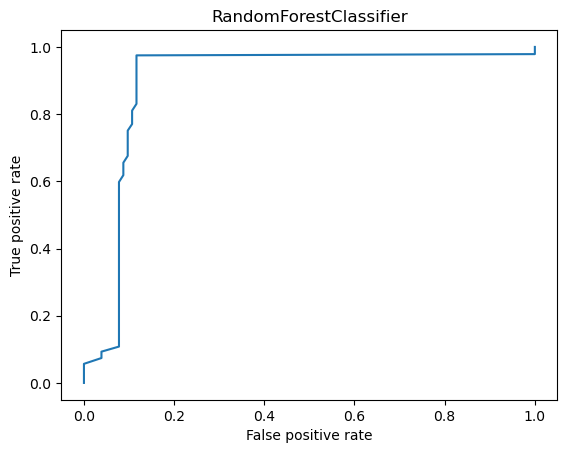

In [146]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

As from this data set we have following conclusion:

1) Taking price as y variable is predicting well for this model as comapared to region
2) Also r2 score value is also less  then accuracy score

In [147]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

Original  Predicted
0           41         41
1           17         40
2            3          3
3           33         33
4           24         24
...        ...        ...
5470        46         46
5471        22         22
5472        12         12
5473        20         20
5474        33         33

[5475 rows x 2 columns]

# Concluding Remarks

In addition, the score value of R2 is also less than the accuracy score.

The average price, the total exchanges and the total volume are well distributed among all the other columns

There are no outliers in the dataset after replacing it with the mean value.

Since year is the most negatively correlated column of all columns

Between August and October the price of avocado is much higher compared to other months.

Hartford Springfield, San Francisco and New York are having more average price as compared to another region

As organic type of avocado is having the more price per unit then conventional

I had done prediction using region and price but using price the prediction score is high as compared to region

So in this data set we are using both regression and classification technique for making this model